In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from textwrap import wrap
import re
import seaborn as sns
from pandas import DataFrame
import math 

## loading data

In [2]:
#batch1
batch1_desc_type_fkappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/descri-code_Fleiss_kappa.csv')
batch1_desc_type_fkappa = batch1_desc_type_fkappa.rename(columns ={'Unnamed: 0':'desc_id'}) 
batch1_desc_type_fkappa = batch1_desc_type_fkappa.set_index('desc_id')
batch1_desc_type_kalpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/description-code_Krippendroffis_alpha.csv')
batch1_desc_type_kalpha = batch1_desc_type_kalpha.rename(columns ={'desrciption':'desc_id'}) 
batch1_desc_type_kalpha = batch1_desc_type_kalpha.set_index('desc_id')
batch1_desc_type_kalpha = batch1_desc_type_kalpha.drop(columns=['Unnamed: 0'])

batch1_sql_type_fkappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/record_id-code_Fleiss_kappa.csv')
batch1_sql_type_fkappa = batch1_sql_type_fkappa.set_index('record_id')
batch1_sql_type_fkappa = batch1_sql_type_fkappa.drop(columns=['Unnamed: 0'])

batch1_sql_type_kalpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/record_id-code_Krippendroffis_alpha.csv')
batch1_sql_type_kalpha = batch1_sql_type_kalpha.set_index('record_id')
batch1_sql_type_kalpha = batch1_sql_type_kalpha.drop(columns=['Unnamed: 0'])

df = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/46iter1_stability.csv')
df = df.rename(columns ={'Unnamed: 0':'type'}) 
df = df.set_index('type')
ls3 = pd.to_numeric(df.T['inter3/union'], errors = 'coerce')
ls4 = pd.to_numeric(df.T['inter4/union'], errors = 'coerce')
ave = [0] * (len(df.T.columns)-2)
ave.append(sum(ls4)/len(df.T))
ave.append(sum(ls3)/len(df.T))
df['ave'] = ave
batch1_sql_type_stabilitydf = df.T
batch1_sql_type_stability = batch1_sql_type_stabilitydf[['inter4/union','inter3/union']]
batch1_sql_type_stability = batch1_sql_type_stability.rename(columns ={'inter3/union':'stability3'}) 
batch1_sql_type_stability = batch1_sql_type_stability.rename(columns ={'inter4/union':'stability4'}) 
batch1_sql_type_stability['stability4'] = pd.to_numeric(batch1_sql_type_stability['stability4'], errors = 'coerce')
batch1_sql_type_stability['stability3'] = pd.to_numeric(batch1_sql_type_stability['stability3'], errors = 'coerce')

batch1_sql_category_stability = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_stability.csv')
batch1_sql_category_stability = batch1_sql_category_stability.T
batch1_sql_category_stability.columns = batch1_sql_category_stability.iloc[0]
batch1_sql_category_stabilitydf = batch1_sql_category_stability.iloc[1::]
batch1_sql_category_stability = batch1_sql_category_stabilitydf[['inter4/union','inter3/union']]
batch1_sql_category_stability = batch1_sql_category_stability.rename(columns ={'inter3/union':'b1_stability3'}) 
batch1_sql_category_stability = batch1_sql_category_stability.rename(columns ={'inter4/union':'b1_stability4'})


batch1_category_sql_fkappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_Fleiss_kappa.csv')
batch1_category_sql_fkappa = batch1_category_sql_fkappa.set_index('Unnamed: 0')
batch1_category_sql_kalpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_Krippendroffis_alpha.csv')
batch1_category_sql_kalpha = batch1_category_sql_kalpha.set_index('category')
batch1_sql_category_stability


#batch2
batch2_sql_type_fkappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_sql-type_Fleiss_kappa.csv')
batch2_sql_type_fkappa = batch2_sql_type_fkappa.rename(columns ={'Unnamed: 0':'sql_id'}) 
batch2_sql_type_fkappa = batch2_sql_type_fkappa.set_index('sql_id')

batch2_sql_type_kalpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_sql-type_Krippendroffis_alpha.csv')
batch2_sql_type_kalpha = batch2_sql_type_kalpha.rename(columns ={'batch2_sql_id':'sql_id'}) 
batch2_sql_type_kalpha = batch2_sql_type_kalpha.set_index('sql_id')

df = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_sql-type_stability.csv')
df = df.rename(columns ={'Unnamed: 0':'type'}) 
df = df.set_index('type')
t_df = df.T.dropna()
ls3 = pd.to_numeric(t_df['inter3/union'], errors = 'coerce')
ls4 = pd.to_numeric(t_df['inter4/union'], errors = 'coerce')
ave = [0] * (len(t_df.columns)-2)
ave.append(sum(ls4)/len(t_df))
ave.append(sum(ls3)/len(t_df))
df['ave'] = ave
batch2_sql_type_stabilitydf = df.T.dropna()
batch2_sql_type_stability = batch2_sql_type_stabilitydf[['inter4/union','inter3/union']]
batch2_sql_type_stability = batch2_sql_type_stability.rename(columns ={'inter3/union':'stability3'}) 
batch2_sql_type_stability = batch2_sql_type_stability.rename(columns ={'inter4/union':'stability4'}) 
batch2_sql_type_stability['stability4'] = pd.to_numeric(batch2_sql_type_stability['stability4'], errors = 'coerce')
batch2_sql_type_stability['stability3'] = pd.to_numeric(batch2_sql_type_stability['stability3'], errors = 'coerce')

batch2_category_sql_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_category-sql_agreement.csv')
batch2_category_sql_fk = batch2_category_sql_fk.rename(columns ={'error_type':'category'}) 
batch2_category_sql_fk = batch2_category_sql_fk.set_index('category')
batch2_category_sql_fk = batch2_category_sql_fk.drop(columns=['Unnamed: 0'])
batch2_category_sql_fkappa = batch2_category_sql_fk[['Fleiss_kappa']]
batch2_category_sql_kalpha = batch2_category_sql_fk[['Krippendroffis_alpha']]

df = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_category_stability.csv')
df = df.rename(columns ={'Unnamed: 0':'category'}) 
df = df.set_index('category')
t_df = df.T.dropna()
ls3 = pd.to_numeric(t_df['inter3/union'], errors = 'coerce')
ls4 = pd.to_numeric(t_df['inter4/union'], errors = 'coerce')
ave = [0] * (len(t_df.columns)-2)
ave.append(sum(ls4)/len(t_df))
ave.append(sum(ls3)/len(t_df))
df['ave'] = ave
batch2_sql_category_stabilitydf = df.T.dropna()
batch2_sql_category_stability = batch2_sql_category_stabilitydf[['inter4/union','inter3/union']]
batch2_sql_category_stability = batch2_sql_category_stability.rename(columns ={'inter3/union':'stability3'}) 
batch2_sql_category_stability = batch2_sql_category_stability.rename(columns ={'inter4/union':'stability4'}) 
batch2_sql_category_stability['stability4'] = pd.to_numeric(batch2_sql_category_stability['stability4'], errors = 'coerce')
batch2_sql_category_stability['stability3'] = pd.to_numeric(batch2_sql_category_stability['stability3'], errors = 'coerce')
# to calculate the missing score in batch2 the file below
# /Users/tianyisun/Desktop/NLQbatches/batch2/batch2_category_ann.csv

#batch3
batch3_sql_type_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_sql-type_agreement.csv')
batch3_sql_type_fk = batch3_sql_type_fk.set_index('sql_id')
batch3_sql_type_fk = batch3_sql_type_fk.drop(columns=['Unnamed: 0'])
batch3_sql_type_kalpha = batch3_sql_type_fk[['Fleiss_kappa']]
batch3_sql_type_kalpha = batch3_sql_type_fk[['Krippendroffis_alpha']]
batch3_sql_type_stabilitydf = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_sql-type_stability.csv')
batch3_sql_type_stabilitydf = batch3_sql_type_stabilitydf.T
batch3_sql_type_stabilitydf.columns = batch3_sql_type_stabilitydf.iloc[0]
batch3_sql_type_stabilitydf = batch3_sql_type_stabilitydf.iloc[1::]
batch3_sql_type_stability = batch3_sql_type_stabilitydf[['inter4/union','inter3/union']]
batch3_sql_type_stability = batch3_sql_type_stability.rename(columns ={'inter3/union':'stability3'}) 
batch3_sql_type_stability = batch3_sql_type_stability.rename(columns ={'inter4/union':'stability4'}) 
batch3_sql_type_stability['stability4'] = pd.to_numeric(batch3_sql_type_stability['stability4'], errors = 'coerce')
batch3_sql_type_stability['stability3'] = pd.to_numeric(batch3_sql_type_stability['stability3'], errors = 'coerce')

batch3_sql_category_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_sql-category_agreement.csv')
batch3_sql_category_fk = batch3_sql_category_fk.rename(columns ={'batch3_sql_id':'sql_id'}) 
batch3_sql_category_fk = batch3_sql_category_fk.set_index('sql_id')
batch3_sql_category_fk = batch3_sql_category_fk.drop(columns=['Unnamed: 0'])
batch3_sql_category_fkappa = batch3_sql_category_fk[['Fleiss_kappa']]
batch3_sql_category_kalpha = batch3_sql_category_fk[['Krippendroffis_alpha']]

df = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_category-sql_result.csv')
df = df.rename(columns ={'error_category':'category'}) 
df = df.set_index('category')
df = df.rename(columns ={'stability_inter4':'stability4'}) 
df = df.rename(columns ={'stability_inter34':'stability3'}) 
batch3_sql_category_stability =df[['stability3', 'stability4']]

batch3_category_sql_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_category-sql_result.csv')
batch3_category_sql_fk = batch3_category_sql_fk.rename(columns ={'error_category':'category'})
batch3_category_sql_fk = batch3_category_sql_fk.set_index('category')
batch3_category_sql_fk = batch3_category_sql_fk.drop(columns=['Unnamed: 0'])
batch3_category_sql_fkappa = batch3_category_sql_fk[['Fleiss_kappa']]
batch3_category_sql_kalpha = batch3_category_sql_fk[['Krippendroffis_alpha']]

#batch4
batch4_sql_type_category_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/batch4_sql-category:type_agreement.csv')
batch4_sql_type_category_fk = batch4_sql_type_category_fk.set_index('sql_id')
batch4_sql_type_category_fk = batch4_sql_type_category_fk.drop(columns=['Unnamed: 0'])

batch4_sql_type_fkappa = batch4_sql_type_category_fk[['type_Fleiss_kappa']]
batch4_sql_type_fkappa = batch4_sql_type_fkappa.rename(columns ={'type_Fleiss_kappa':'Fleiss_kappa'}) 

batch4_sql_type_kalpha = batch4_sql_type_category_fk[['type_Krippendroffis_alpha']]
batch4_sql_type_kalpha = batch4_sql_type_kalpha.rename(columns ={'type_Krippendroffis_alpha':'Krippendroffis_alpha'})

batch4_sql_category_fkappa = batch4_sql_type_category_fk[['category_Fleiss_kappa']]
batch4_sql_category_fkappa = batch4_sql_category_fkappa.rename(columns ={'category_Fleiss_kappa':'Fleiss_kappa'}) 

batch4_sql_category_kalpha = batch4_sql_type_category_fk[['category_Krippendroffis_alpha']]
batch4_sql_category_kalpha = batch4_sql_category_kalpha.rename(columns ={'category_Krippendroffis_alpha':'Krippendroffis_alpha'})

batch4_sql_type_stabilitydf = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/batch4_sql-type_stability.csv')
batch4_sql_type_stabilitydf.columns = batch4_sql_type_stabilitydf.iloc[0]
batch4_sql_type_stabilitydf = batch4_sql_type_stabilitydf.iloc[1::] 
batch4_sql_type_stabilitydf = batch4_sql_type_stabilitydf.rename(columns ={'error_category':'type'}) 
batch4_sql_type_stabilitydf = batch4_sql_type_stabilitydf.set_index('type')
batch4_sql_type_stabilitydf = batch4_sql_type_stabilitydf.rename(columns ={'inter2/union':'stability'}) 
batch4_sql_type_stability = batch4_sql_type_stabilitydf[['stability']]
batch4_sql_type_stability['stability'] = pd.to_numeric(batch4_sql_type_stability['stability'], errors = 'coerce')

batch4_sql_category_stabilityd = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/batch4_sql-category_stability.csv')
batch4_sql_category_stabilityd.columns = batch4_sql_category_stabilityd.iloc[0]
batch4_sql_category_stabilitydf = batch4_sql_category_stabilityd.iloc[1::]
batch4_sql_category_stabilitydf = batch4_sql_category_stabilitydf.rename(columns ={'error_category':'category'})
batch4_sql_category_stabilitydf = batch4_sql_category_stabilitydf.set_index('category')
batch4_sql_category_stability = batch4_sql_category_stabilitydf[['inter2/union']]
batch4_sql_category_stability = batch4_sql_category_stability.rename(columns ={'inter2/union':'stability'})
batch4_sql_category_stability['stability'] = pd.to_numeric(batch4_sql_category_stability['stability'], errors = 'coerce')

batch4_category_sql_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/batch4_category-sql_agreement.csv')
batch4_category_sql_fk = batch4_category_sql_fk.set_index('category')
batch4_category_sql_fk = batch4_category_sql_fk.drop(columns=['Unnamed: 0'])
batch4_category_sql_fkappa = batch4_category_sql_fk[['Fleiss_kappa']]
batch4_category_sql_kalpha = batch4_category_sql_fk[['Krippendroffis_alpha']]

#batch5
batch5_sql_type_category_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/batch5_agreements.csv')
batch5_sql_type_category_fk = batch5_sql_type_category_fk.set_index('sql_id')
batch5_sql_type_category_fk = batch5_sql_type_category_fk.drop(columns=['Unnamed: 0'])

batch5_sql_type_fkappa = batch5_sql_type_category_fk[['type_Fleiss_kappa']]
batch5_sql_type_fkappa = batch5_sql_type_fkappa.rename(columns ={'type_Fleiss_kappa':'Fleiss_kappa'}) 

batch5_sql_type_kalpha = batch5_sql_type_category_fk[['type_Krippendroffis_alpha']]
batch5_sql_type_kalpha = batch5_sql_type_kalpha.rename(columns ={'type_Krippendroffis_alpha':'Krippendroffis_alpha'})

batch5_sql_category_fkappa = batch5_sql_type_category_fk[['category_Fleiss_kappa']]
batch5_sql_category_fkappa = batch5_sql_category_fkappa.rename(columns ={'category_Fleiss_kappa':'Fleiss_kappa'}) 

batch5_sql_category_kalpha = batch5_sql_type_category_fk[['category_Krippendroffis_alpha']]
batch5_sql_category_kalpha = batch5_sql_category_kalpha.rename(columns ={'category_Krippendroffis_alpha':'Krippendroffis_alpha'})


batch5_sql_type_stabilityd = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/batch5_type_stability.csv')
batch5_sql_type_stabilityd.columns = batch5_sql_type_stabilityd.iloc[0]
batch5_sql_type_stabilitydf = batch5_sql_type_stabilityd.iloc[1::]
batch5_sql_type_stabilitydf = batch5_sql_type_stabilitydf.rename(columns ={'error_category':'type'})
batch5_sql_type_stabilitydf = batch5_sql_type_stabilitydf.set_index('type')

batch5_sql_type_stability = batch5_sql_type_stabilitydf[['inter2/union']]
batch5_sql_type_stability = batch5_sql_type_stability.rename(columns ={'inter2/union':'stability'})
batch5_sql_type_stability['stability'] = pd.to_numeric(batch5_sql_type_stability['stability'], errors = 'coerce')


batch5_sql_category_stabilityd = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/batch5_category_stability.csv')
batch5_sql_category_stabilityd = batch5_sql_category_stabilityd.rename(columns ={'Unnamed: 0':'category'})
df = batch5_sql_category_stabilityd.T
df.columns = df.iloc[0]
batch5_sql_category_stabilitydf = df.iloc[1::]

batch5_category_fksta = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/batch5_category_results.csv')
batch5_category_fksta = batch5_category_fksta.drop(columns=['Unnamed: 0'])
batch5_category_fksta = batch5_category_fksta.set_index('category')
batch5_category_fksta = batch5_category_fksta.rename(columns ={'category_stability':'stability'})
batch5_category_sql_fkappa = batch5_category_fksta[['Fleiss_kappa']]
batch5_category_sql_kalpha = batch5_category_fksta[['Krippendroffis_alpha']]

batch5_sql_category_stability = batch5_category_fksta[['stability']]

#batch6
batch6_sql_type_category_fk = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_agreements.csv')
batch6_sql_type_category_fk = batch6_sql_type_category_fk.set_index('sql_id')
batch6_sql_type_category_fk = batch6_sql_type_category_fk.drop(columns=['Unnamed: 0'])

batch6_sql_type_fkappa = batch6_sql_type_category_fk[['type_Fleiss_kappa']]
batch6_sql_type_fkappa = batch6_sql_type_fkappa.rename(columns ={'type_Fleiss_kappa':'Fleiss_kappa'}) 

batch6_sql_type_kalpha = batch6_sql_type_category_fk[['type_Krippendroffis_alpha']]
batch6_sql_type_kalpha = batch6_sql_type_kalpha.rename(columns ={'type_Krippendroffis_alpha':'Krippendroffis_alpha'})

batch6_sql_category_fkappa = batch6_sql_type_category_fk[['category_Fleiss_kappa']]
batch6_sql_category_fkappa = batch6_sql_category_fkappa.rename(columns ={'category_Fleiss_kappa':'Fleiss_kappa'}) 

batch6_sql_category_kalpha = batch6_sql_type_category_fk[['category_Krippendroffis_alpha']]
batch6_sql_category_kalpha = batch6_sql_category_kalpha.rename(columns ={'category_Krippendroffis_alpha':'Krippendroffis_alpha'})

batch6_sql_type_stabilityd = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_type_stability.csv')
batch6_sql_type_stabilityd.columns = batch6_sql_type_stabilityd.iloc[0]
batch6_sql_type_stabilitydf = batch6_sql_type_stabilityd.iloc[1::]
batch6_sql_type_stabilitydf = batch6_sql_type_stabilitydf.rename(columns ={'error_category':'type'})
batch6_sql_type_stabilitydf = batch6_sql_type_stabilitydf.set_index('type')

batch6_sql_type_stability = batch6_sql_type_stabilitydf[['inter2/union']]
batch6_sql_type_stability = batch6_sql_type_stability.rename(columns ={'inter2/union':'stability'})
batch6_sql_type_stability['stability'] = pd.to_numeric(batch6_sql_type_stability['stability'], errors = 'coerce')
batch6_sql_type_stability = batch6_sql_type_stability.drop('Unnamed: 51', axis=0)

batch6_sql_category_stabilityd = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_category_stability.csv')
batch6_sql_category_stabilityd = batch6_sql_category_stabilityd.rename(columns ={'Unnamed: 0':'category'})
df = batch6_sql_category_stabilityd.T
df.columns = df.iloc[0]
batch6_sql_category_stabilitydf = df.iloc[1::]

batch6_category_fksta = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_category_results.csv')
batch6_category_fksta = batch6_category_fksta.drop(columns=['Unnamed: 0'])
batch6_category_fksta = batch6_category_fksta.set_index('category')
batch6_category_fksta = batch6_category_fksta.rename(columns ={'category_stability':'stability'})
batch6_category_sql_fkappa = batch6_category_fksta[['Fleiss_kappa']]
batch6_category_sql_kalpha = batch6_category_fksta[['Krippendroffis_alpha']]

batch6_sql_category_stability = batch6_category_fksta[['stability']]

/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_35692/1182433940.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch4_sql_type_stability['stability'] = pd.to_numeric(batch4_sql_type_stability['stability'], errors = 'coerce')


In [3]:
import os
for dirname, _, filenames in os.walk('/Users/tianyisun/Desktop/NLQbatches/batch6'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/tianyisun/Desktop/NLQbatches/batch6/updated_annotation_feedback_batch6.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_3_.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_nz.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_category_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/.DS_Store
/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_sql-type_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_anntask_sql_errorcategory.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/annotationsdescription.numbers
/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_sql-category_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_sql-category_Krippendroffis_alpha.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_sql-type_Krippendroffis_alpha.csv
/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_sql-category_agreement.csv
/Users/tianyisun/Deskt

In [4]:
b6 = pd.read_csv('//Users/tianyisun/Desktop/NLQbatches/batch6/updated_annotation_feedback_batch6.csv')
b5 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/annotation_feedback_batch5.csv')
b56 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/annotation_feedback_batch5.csv')
len(b5.nl_query.unique())
#len(b56.nl_query.unique())
len(b6.nl_query.unique())
DataFrame(b6.nl_query.unique(), columns = ['unique_nlq']).to_csv('venn_nql/batch6_id.csv')

In [7]:
tianyi = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/annotation_feedback_coded_tianyi_v2.csv')
len(tianyi.nl_query.unique())
DataFrame(tianyi.nl_query.unique(), columns = ['unique_nlq']).to_csv('venn_nql/batch1_id.csv')

In [8]:
ann1 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_anntask_sql_type.csv')
ann1 = ann1.set_index('sql_id')
ann1 = ann1.dropna()
ann1tianyi = ann1[ann1.username =='tianyi'] 
ann1zhengn = ann1[ann1.username =='zhengn']
ann1toby = ann1[ann1.username =='toby'] 
ann1zhengz = ann1[ann1.username =='zhengz'] 

ann2 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_annotationtask.csv')
ann2 = ann2.rename(columns ={'category':'code'}) 
ann2 = ann2.set_index('sql_id')
ann2 = ann2.dropna()
ann2tianyi = ann2[ann2.username =='tianyi'] 
ann2zhengn = ann2[ann2.username =='zhengning']
ann2toby = ann2[ann2.username =='toby'] 
ann2zhengz = ann2[ann2.username =='zhengzhang'] 

ann3 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_type_ann.csv')
ann3 = ann3.rename(columns ={'category':'code'}) 
ann3 = ann3.set_index('sql_id')
ann3 = ann3.dropna()
ann3tianyi = ann3[ann3.username =='tianyi'] 
ann3zhengn = ann3[ann3.username =='zhengning']
ann3toby = ann3[ann3.username =='toby'] 
ann3zhengz = ann3[ann3.username =='zhengzhang'] 

ann4 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/correct_batch4_anntask_sql_type.csv')
ann4 = ann4.rename(columns ={'category':'code'}) 
ann4 = ann4.set_index('sql_id')
ann4 = ann4.dropna()
ann4tianyi = ann4[ann4.username =='tianyi'] 
ann4zhengn = ann4[ann4.username =='zhengning']

ann5 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/correct_batch5_anntask_sql_type.csv')
ann5 = ann5.set_index('sql_id')
ann5 = ann5.dropna()
ann5 = ann5.drop(columns=['Unnamed: 0'])
ann5tianyi = ann5[ann5.username =='tianyi'] 
ann5zhengning = ann5[ann5.username =='zhengning']

ann6 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_anntask_sql_type.csv')
ann6 = ann6.set_index('sql_id')
ann6 = ann6.dropna()
ann6 = ann6.drop(columns=['Unnamed: 0'])

ann7 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/correct_batch7_anntask_sql_type.csv')
ann7 = ann7.set_index('sql_id')
ann7 = ann7.dropna()
ann7 = ann7.drop(columns=['Unnamed: 0'])

## create ann type& category sum df 

In [9]:
'''
create df for batch 1-6
b1, b2, b3, b4, b5, b6 

'''

def calculate_total(anndf):
    df5 = pd.DataFrame(index = anndf.code.unique(), columns = ['sum'])
    l = []
    for i in df5.index:
        total = len(anndf.index[anndf['code'] == i].tolist())
        l.append(total)
    df5['sum'] = l
    return df5

df5 = calculate_total(ann5)
df5tianyi = calculate_total(ann5tianyi)
df5zhengning = calculate_total(ann5zhengning)
df = pd.merge(df5, df5tianyi, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df5zhengning, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'total'}) 
df = df.rename(columns ={'sum_y':'tianyi'}) 
df = df.rename(columns ={'sum':'zhengning'}) 
df = df.fillna(0)


df1 = calculate_total(ann1)
df1tianyi = calculate_total(ann1tianyi)
df1zhengn = calculate_total(ann1zhengn)
df1zhengz = calculate_total(ann1zhengz)
df1toby = calculate_total(ann1toby)
df = pd.merge(df1, df1tianyi, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'total'}) 
df = df.rename(columns ={'sum_y':'tianyi'})
df = pd.merge(df, df1zhengn, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df1zhengz, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df1toby, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'zhengn'}) 
df = df.rename(columns ={'sum_y':'zhengz'}) 
df = df.rename(columns ={'sum':'toby'}) 
df = df.fillna(0)
df = df[2::]
b1 = df


df2 = calculate_total(ann2)
df2tianyi = calculate_total(ann2tianyi)
df2zhengn = calculate_total(ann2zhengn)
df2zhengz = calculate_total(ann2zhengz)
df2toby = calculate_total(ann2toby)
df = pd.merge(df2, df2tianyi, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'total'}) 
df = df.rename(columns ={'sum_y':'tianyi'})
df = pd.merge(df, df2zhengn, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df2zhengz, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df2toby, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'zhengn'}) 
df = df.rename(columns ={'sum_y':'zhengz'}) 
df = df.rename(columns ={'sum':'toby'}) 
df = df.fillna(0) 
b2 = df


df3 = calculate_total(ann3)
df3tianyi = calculate_total(ann3tianyi)
df3zhengn = calculate_total(ann3zhengn)
df3zhengz = calculate_total(ann3zhengz)
df3toby = calculate_total(ann3toby)
df = pd.merge(df3, df3tianyi, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'total'}) 
df = df.rename(columns ={'sum_y':'tianyi'})
df = pd.merge(df, df3zhengn, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df3zhengz, left_index=True, right_index=True, how = 'outer')
df = pd.merge(df, df3toby, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'zhengn'}) 
df = df.rename(columns ={'sum_y':'zhengz'}) 
df = df.rename(columns ={'sum':'toby'}) 
df = df.fillna(0)
b3 = df


df4 = calculate_total(ann4)
df4tianyi = calculate_total(ann4tianyi)
df4zhengn = calculate_total(ann4zhengn)
df = pd.merge(df4, df4tianyi, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum_x':'total'}) 
df = df.rename(columns ={'sum_y':'tianyi'})
df = pd.merge(df, df4zhengn, left_index=True, right_index=True, how = 'outer')
df = df.rename(columns ={'sum':'zhengn'}) 
df = df.fillna(0)
b4 = df

In [10]:
'''
create a df for batch 2-6: show the sum of sqls for each model
index: category 
column: sum of sqls
'''
'''model2 tsp'''
ann5_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/correct_batch5_anntask_sql_errorcategory.csv')
ann5_category = ann5_category.set_index('sql_id')
ann5_category = ann5_category.drop(columns=['Unnamed: 0'])
ann5_cat = calculate_total(ann5_category)
ann5_cat.head(2)


,sum
B,153
L,178


In [11]:
'''model1 smbop'''
ann1_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_anntask_sql_type.csv')
ann1_category = ann1_category.set_index('sql_id')
#ann1_category = ann1_category.drop(columns=['Unnamed: 0'])
ann1_cat = calculate_total(ann1_category)

ann2_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_category_ann.csv')
ann2_category = ann2_category.set_index('sql_id')
ann2_category = ann2_category.drop(columns=['Unnamed: 0'])
ann2_cat = calculate_total(ann2_category)

ann3_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_category_ann.csv')
ann3_category = ann3_category.set_index('sql_id')
ann3_category = ann3_category.drop(columns=['Unnamed: 0'])
ann3_cat = calculate_total(ann3_category)
ann3_cat.head(3)

ann4_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/correct_batch4_anntask_sql_errorcategory.csv')
ann4_category = ann4_category.set_index('sql_id')
ann4_category = ann4_category.drop(columns=['Unnamed: 0'])
ann4_cat = calculate_total(ann4_category)
ann4_cat.head(3)

smbop_cat_sum = pd.merge(ann1_cat,ann2_cat, left_index=True, right_index=True, how = 'outer')
smbop_cat_sum = smbop_cat_sum.rename(columns ={'sum_x':'b1_sum'}) 
smbop_cat_sum = smbop_cat_sum.rename(columns ={'sum_y':'b2_sum'}) 
smbop_cat_sum = pd.merge(smbop_cat_sum,ann3_cat, left_index=True, right_index=True, how = 'outer')
smbop_cat_sum = smbop_cat_sum.rename(columns ={'sum':'b3_sum'}) 
smbop_cat_sum = pd.merge(smbop_cat_sum,ann4_cat, left_index=True, right_index=True, how = 'outer')
smbop_cat_sum = smbop_cat_sum.rename(columns ={'sum':'b4_sum'}) 

In [12]:
'''model3 Rat_Sql(gzap)'''
ann6_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_anntask_sql_errorcategory.csv')
ann6_category = ann6_category.set_index('sql_id')
ann6_category = ann6_category.drop(columns=['Unnamed: 0'])
ann6_Rat_Sql = calculate_total(ann6_category)

ann7_category = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/correct_batch7_anntask_sql_errorcategory.csv')
ann7_category = ann7_category.set_index('sql_id')
ann7_category = ann7_category.drop(columns=['Unnamed: 0'])
ann7_Rat_Sql = calculate_total(ann7_category)
Rat_Sql_sum = pd.merge(ann6_Rat_Sql,ann7_Rat_Sql, left_index=True, right_index=True, how = 'outer')
Rat_Sql_sum = Rat_Sql_sum.rename(columns ={'sum_x':'b6_sum'}) 
Rat_Sql_sum = Rat_Sql_sum.rename(columns ={'sum_y':'b7_sum'}) 

In [53]:
'''
remove lower case and int in ann
return a list of combination of category
'''
def remove_lower_int(ann):
    ls = []
    for i in ann:
        for j in i: 
            if j.isupper() != True:
                i = i.replace(j, "")
        ls.append(i)
    return ls

'''
create heatmap of sum
'''
def matrix_for_heatmap(ann):
    matrix = DataFrame(0, index = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R'], columns = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R'])
    for i in ann: 
        if len(i) ==1:
            matrix[i].loc[i]+=1
        if len(i) ==2:
            matrix[i[0]].loc[i[1]]+=1
            matrix[i[1]].loc[i[0]]+=1
            matrix[i[0]].loc[i[0]]+=1
            matrix[i[1]].loc[i[1]]+=1
    return matrix

'''
create heatmap of probability (A&B)/A
where row is A and column is B
'''
def matrix_for_prob(matrix_sum):
    for index in range(len(matrix_sum.index)):
        matrix_sum.loc[matrix_sum.index[index]] = round(matrix_sum.loc[matrix_sum.index[index]] / matrix_sum[matrix_sum.index[index]].loc[matrix_sum.index[index]],2)
    return matrix_sum



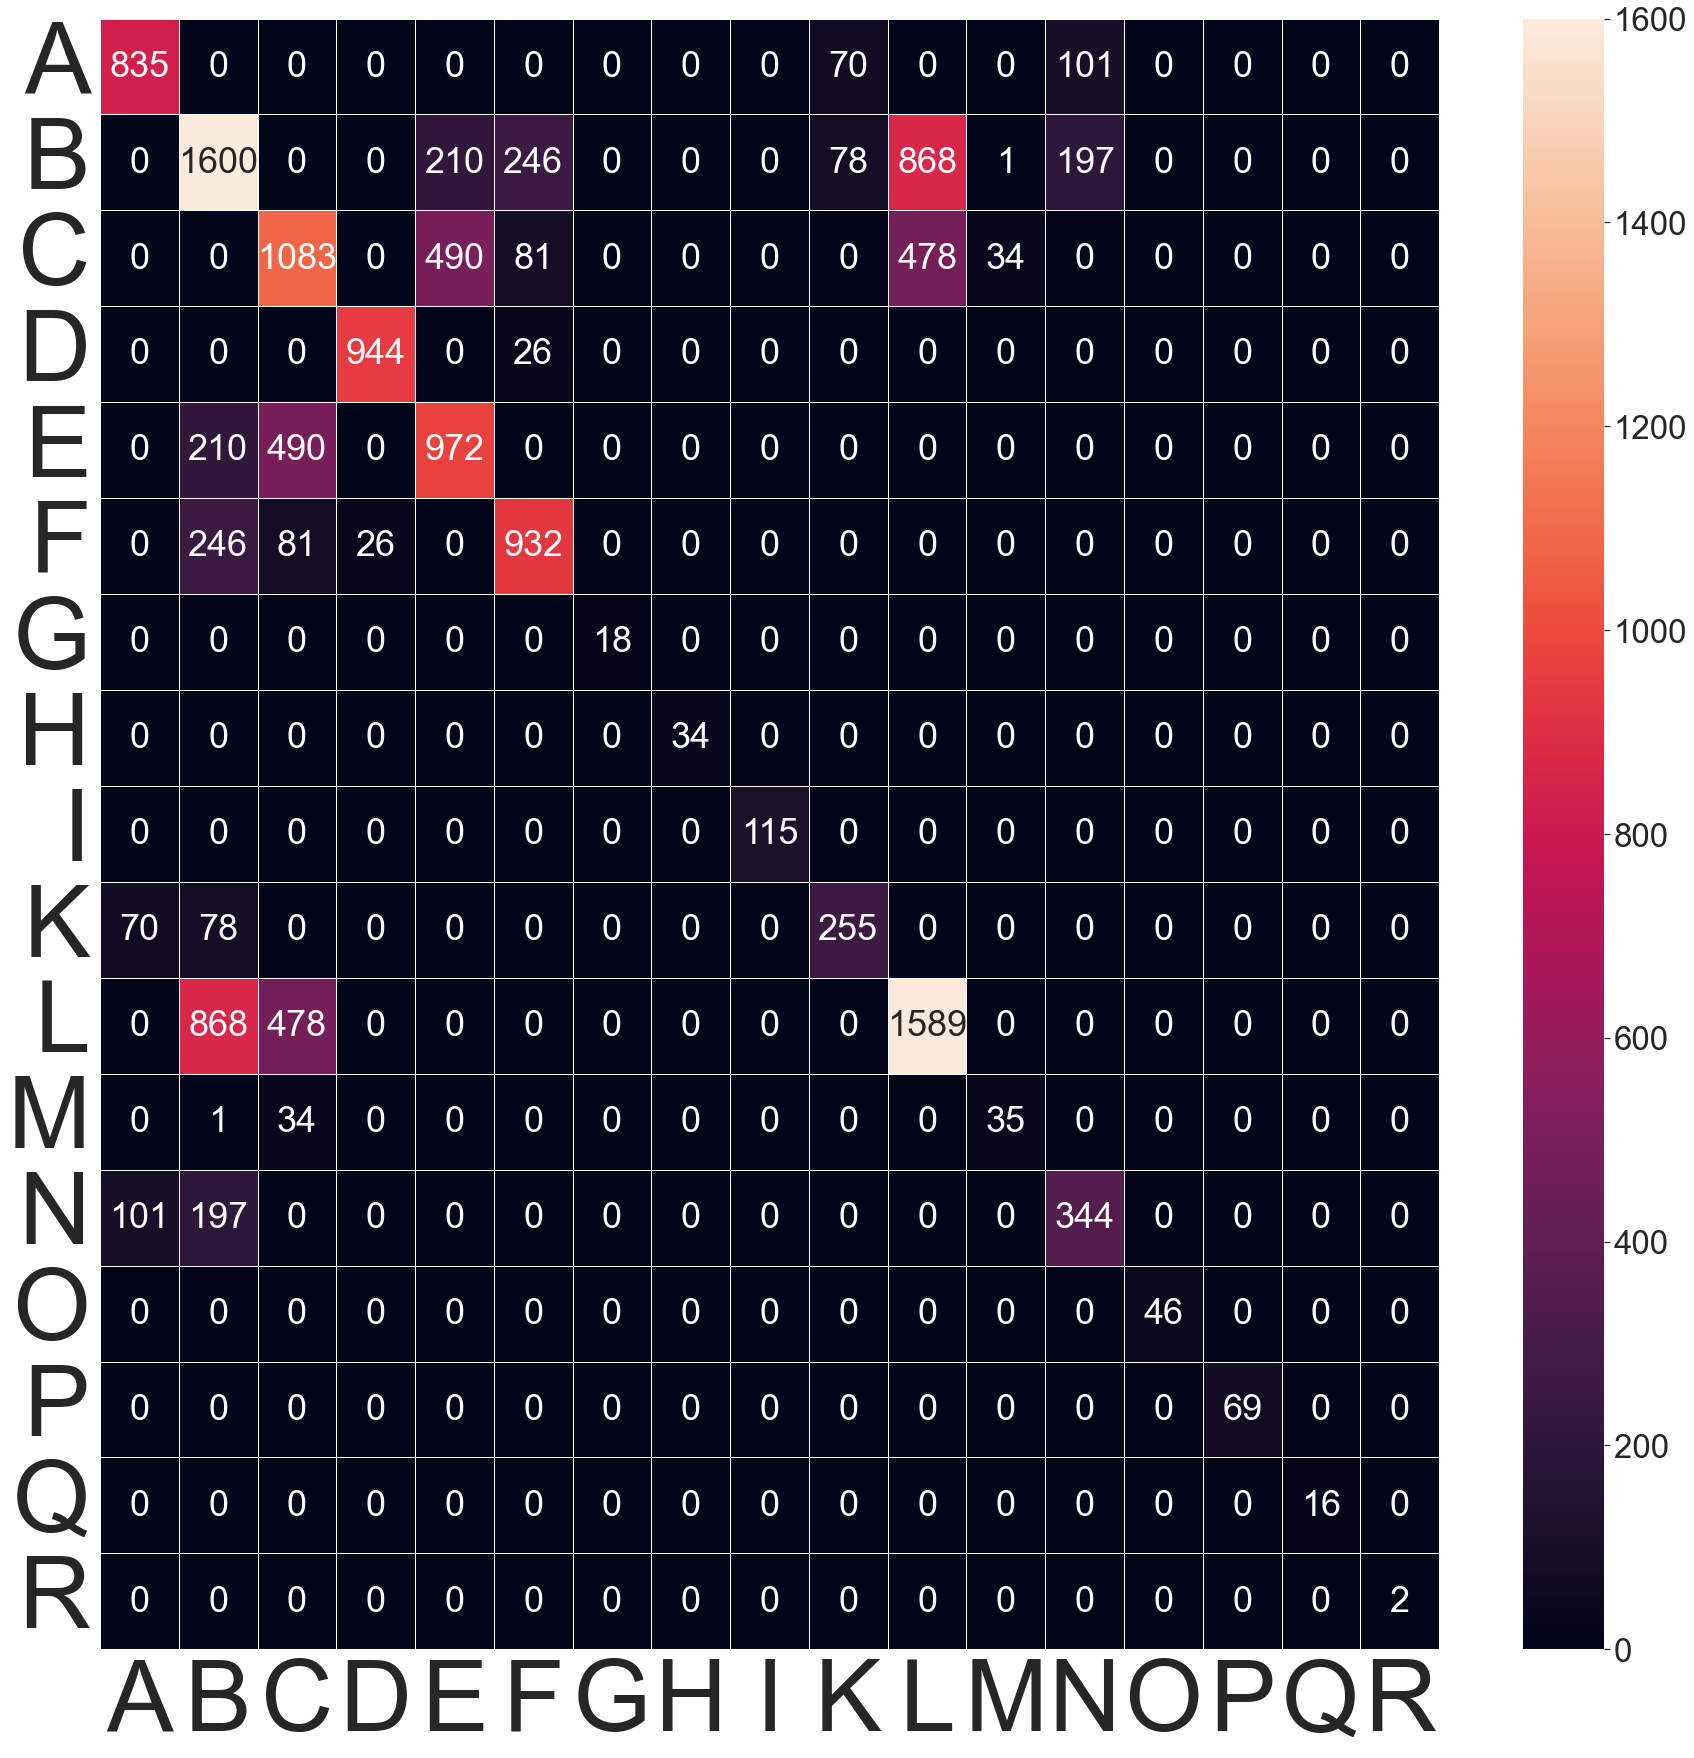

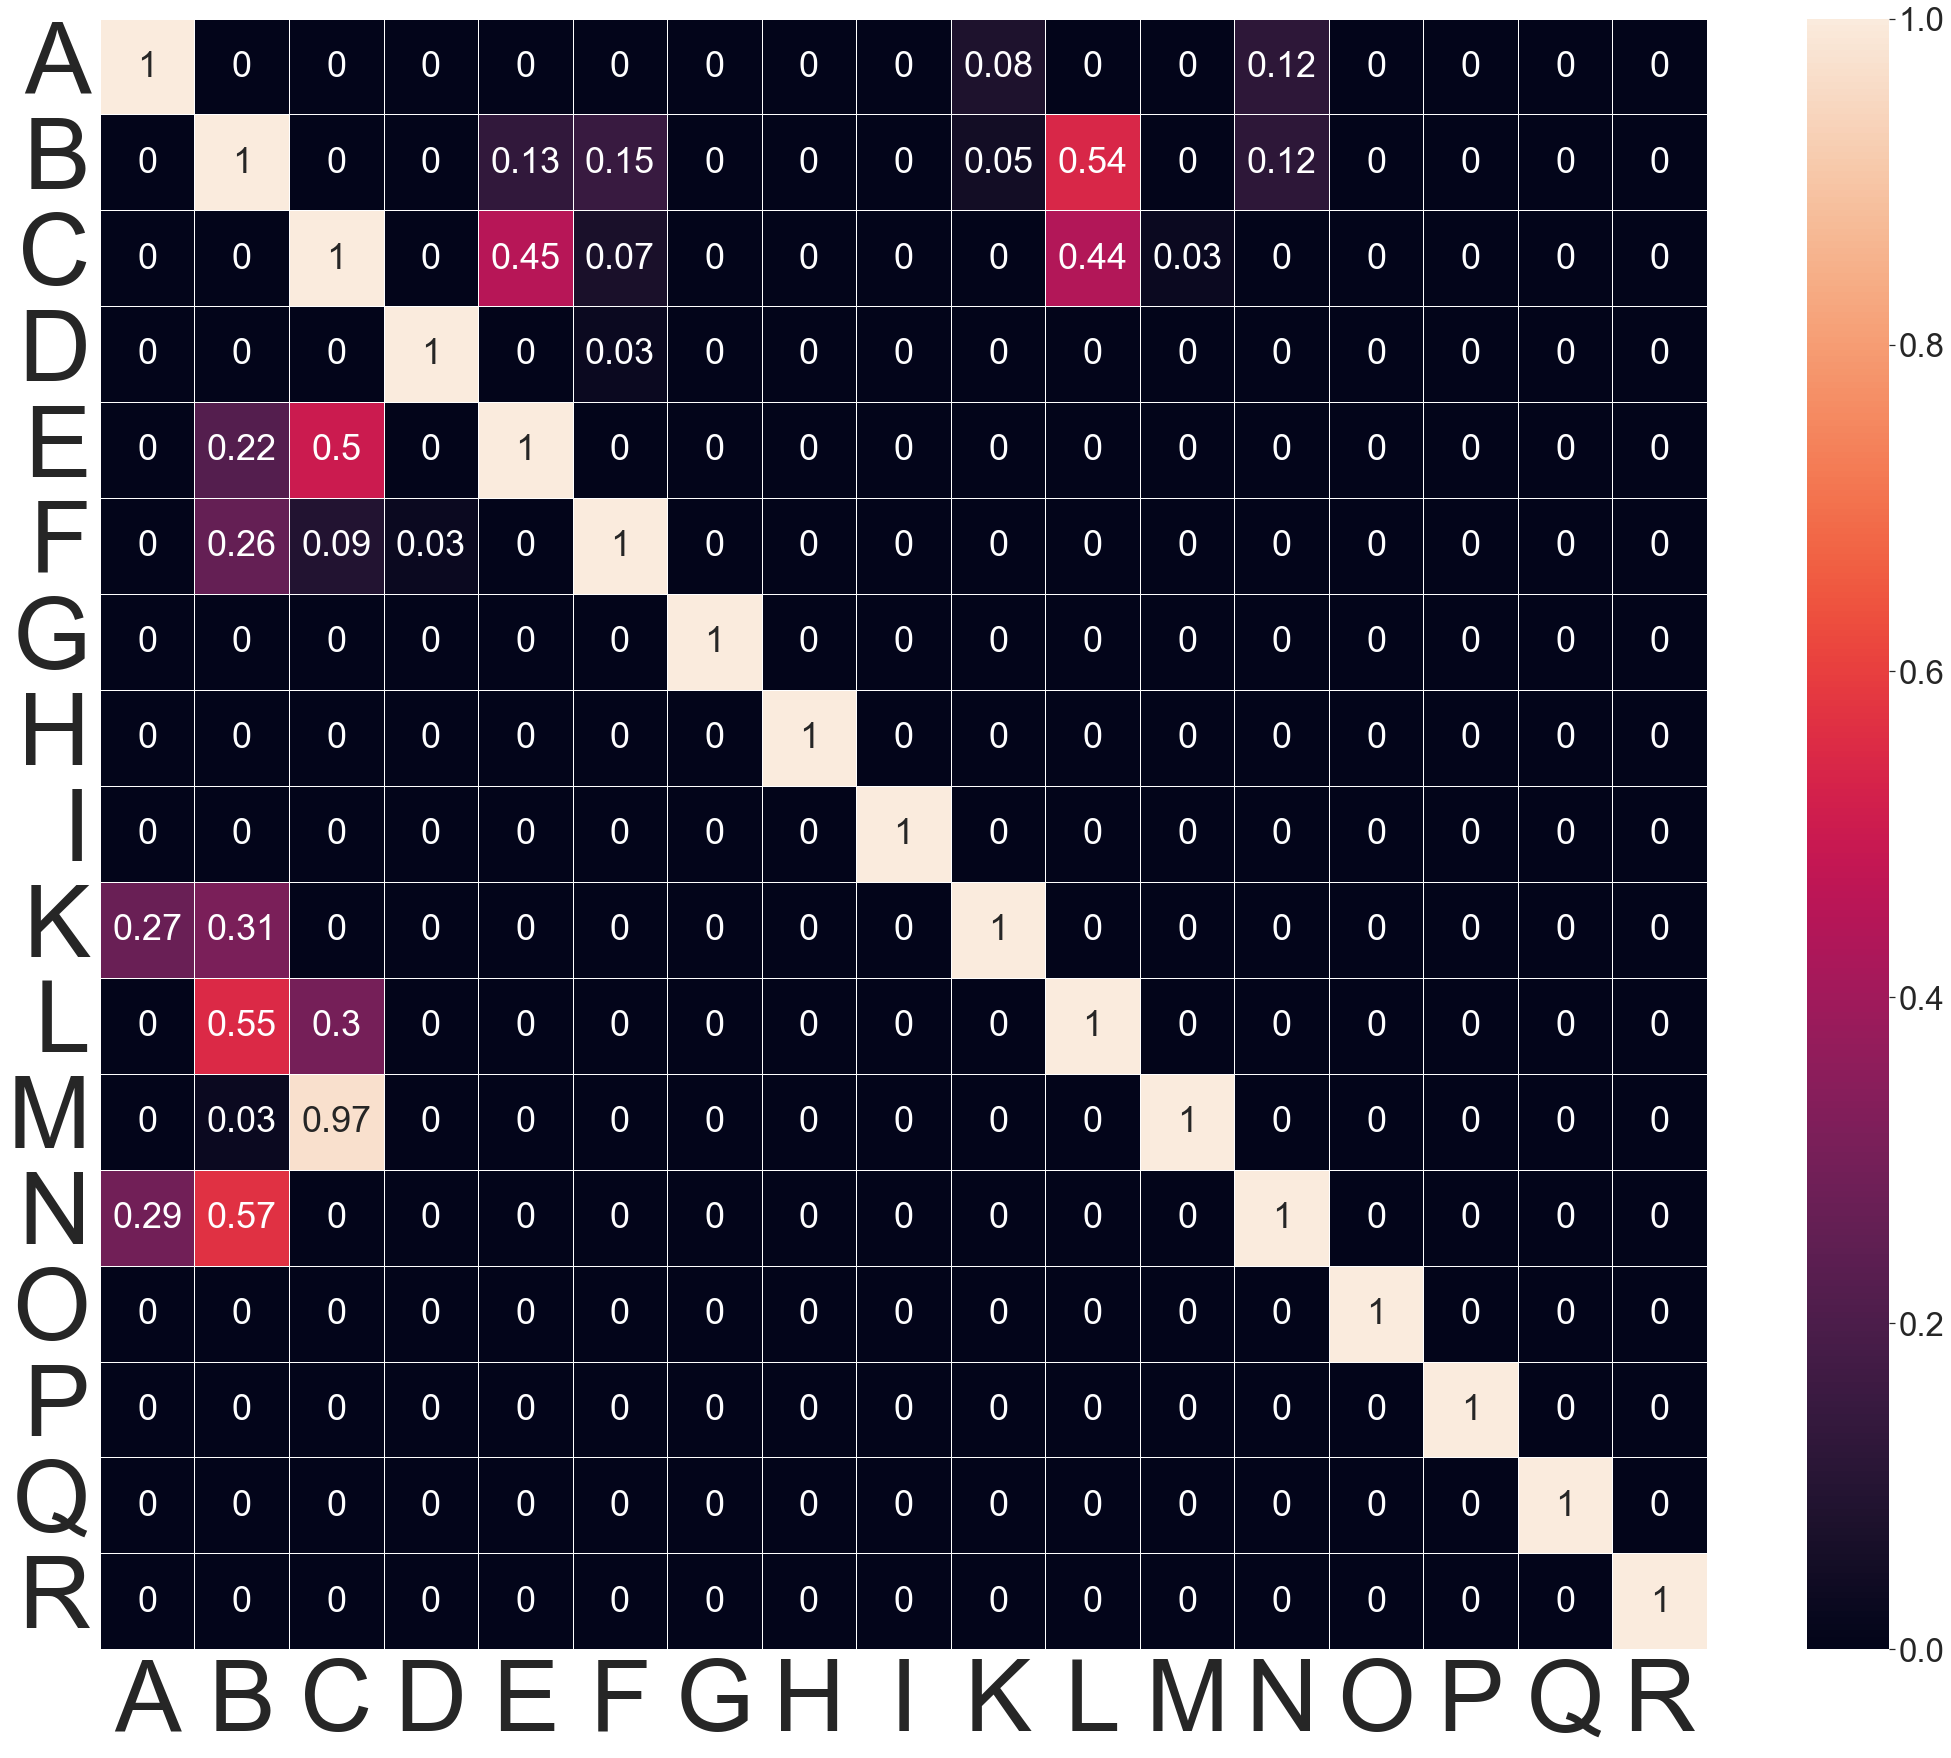

In [56]:
#### '''model1'''
smbop_ann = ann1['code'].append(ann2['code'], ignore_index = True)
smbop_ann = smbop_ann.append(ann3['code'], ignore_index = True)
smbop_ann = smbop_ann.append(ann4['code'], ignore_index = True)
smbop_ann = [str(s) for s in smbop_ann]
a1 = remove_lower_int(smbop_ann)
matrix1 =  matrix_for_heatmap(a1)

'''
heatmap visulization
'''
sns.set_theme(font_scale = 3, color_codes = 'g')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(30,30))
#ax.set_title('SmBoP+GraPPa Model Error Type Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix1, annot=True, fmt ="d", linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/heatmap of error types in model1 -- smbop+grappa (batch1-4).png')

matrix1_prob = matrix_for_prob(matrix1)
'''
heatmap visulization 
'''
sns.set_theme(font_scale = 3, color_codes = 'g')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(36,30))
#ax.set_title('SmBoP+GraPPa Model Error Type Frequence Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix1_prob, annot=True, linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/types freq m1 smbop+grappa(b1-4).png')


**Error Type Heatmap** -- a matrix to visualize how many SQLs who have an error type of its column combining with its row.
 * The diagonal of the matrix means error types who have only one category. For example, ``matrix['A'].loc['A']`` means "A1", "A1a", "A1b", "A1c", "A1d", "A1e", "A1f", "A1g",  "A2a", "A2b", and "A2c".
 * The other indices of the matrix means error types who have two categories. For example, ``matrix['B'].loc['L']`` and ``matrix['L'].loc['B']`` mean "BL1", "BL2", and "BL3".
 * E.g., to take into account an SQL who has errors like "A1c", "I1", and "BI1", the matrix will be updated as 
``matrix['A'].loc['A']+=1``, ``matrix['B'].loc['I']+=1``, ``matrix['I'].loc['B']+=1``, and ``matrix['I'].loc['I']+=1``.

**Error Type Frequence Heatmap** -- a matrix to visualize the precentage of an error type in its raw category.
 * The sum of each row is 1, which contains all SQLs who have an error of row category. For example, for row A in model1, ``matrix['A'].loc['A'] + matrix['A'].loc['K'] + matrix['A'].loc['N'] = 1``, where
 
\begin{equation*}matrix['A'].loc['A'] =  \frac{sum(A)}{sum(A)+sum(AK)+sum(AN)}, \end{equation*} \begin{equation*}matrix['A'].loc['K'] =  \frac{sum(AK)}{sum(A)+sum(AK)+sum(AN)}, \end{equation*} \begin{equation*}matrix['A'].loc['N'] =  \frac{sum(AN)}{sum(A)+sum(AK)+sum(AN)}. \end{equation*}

 * The sum of each column does not need to be 1. The columns do not have any meanings.


\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

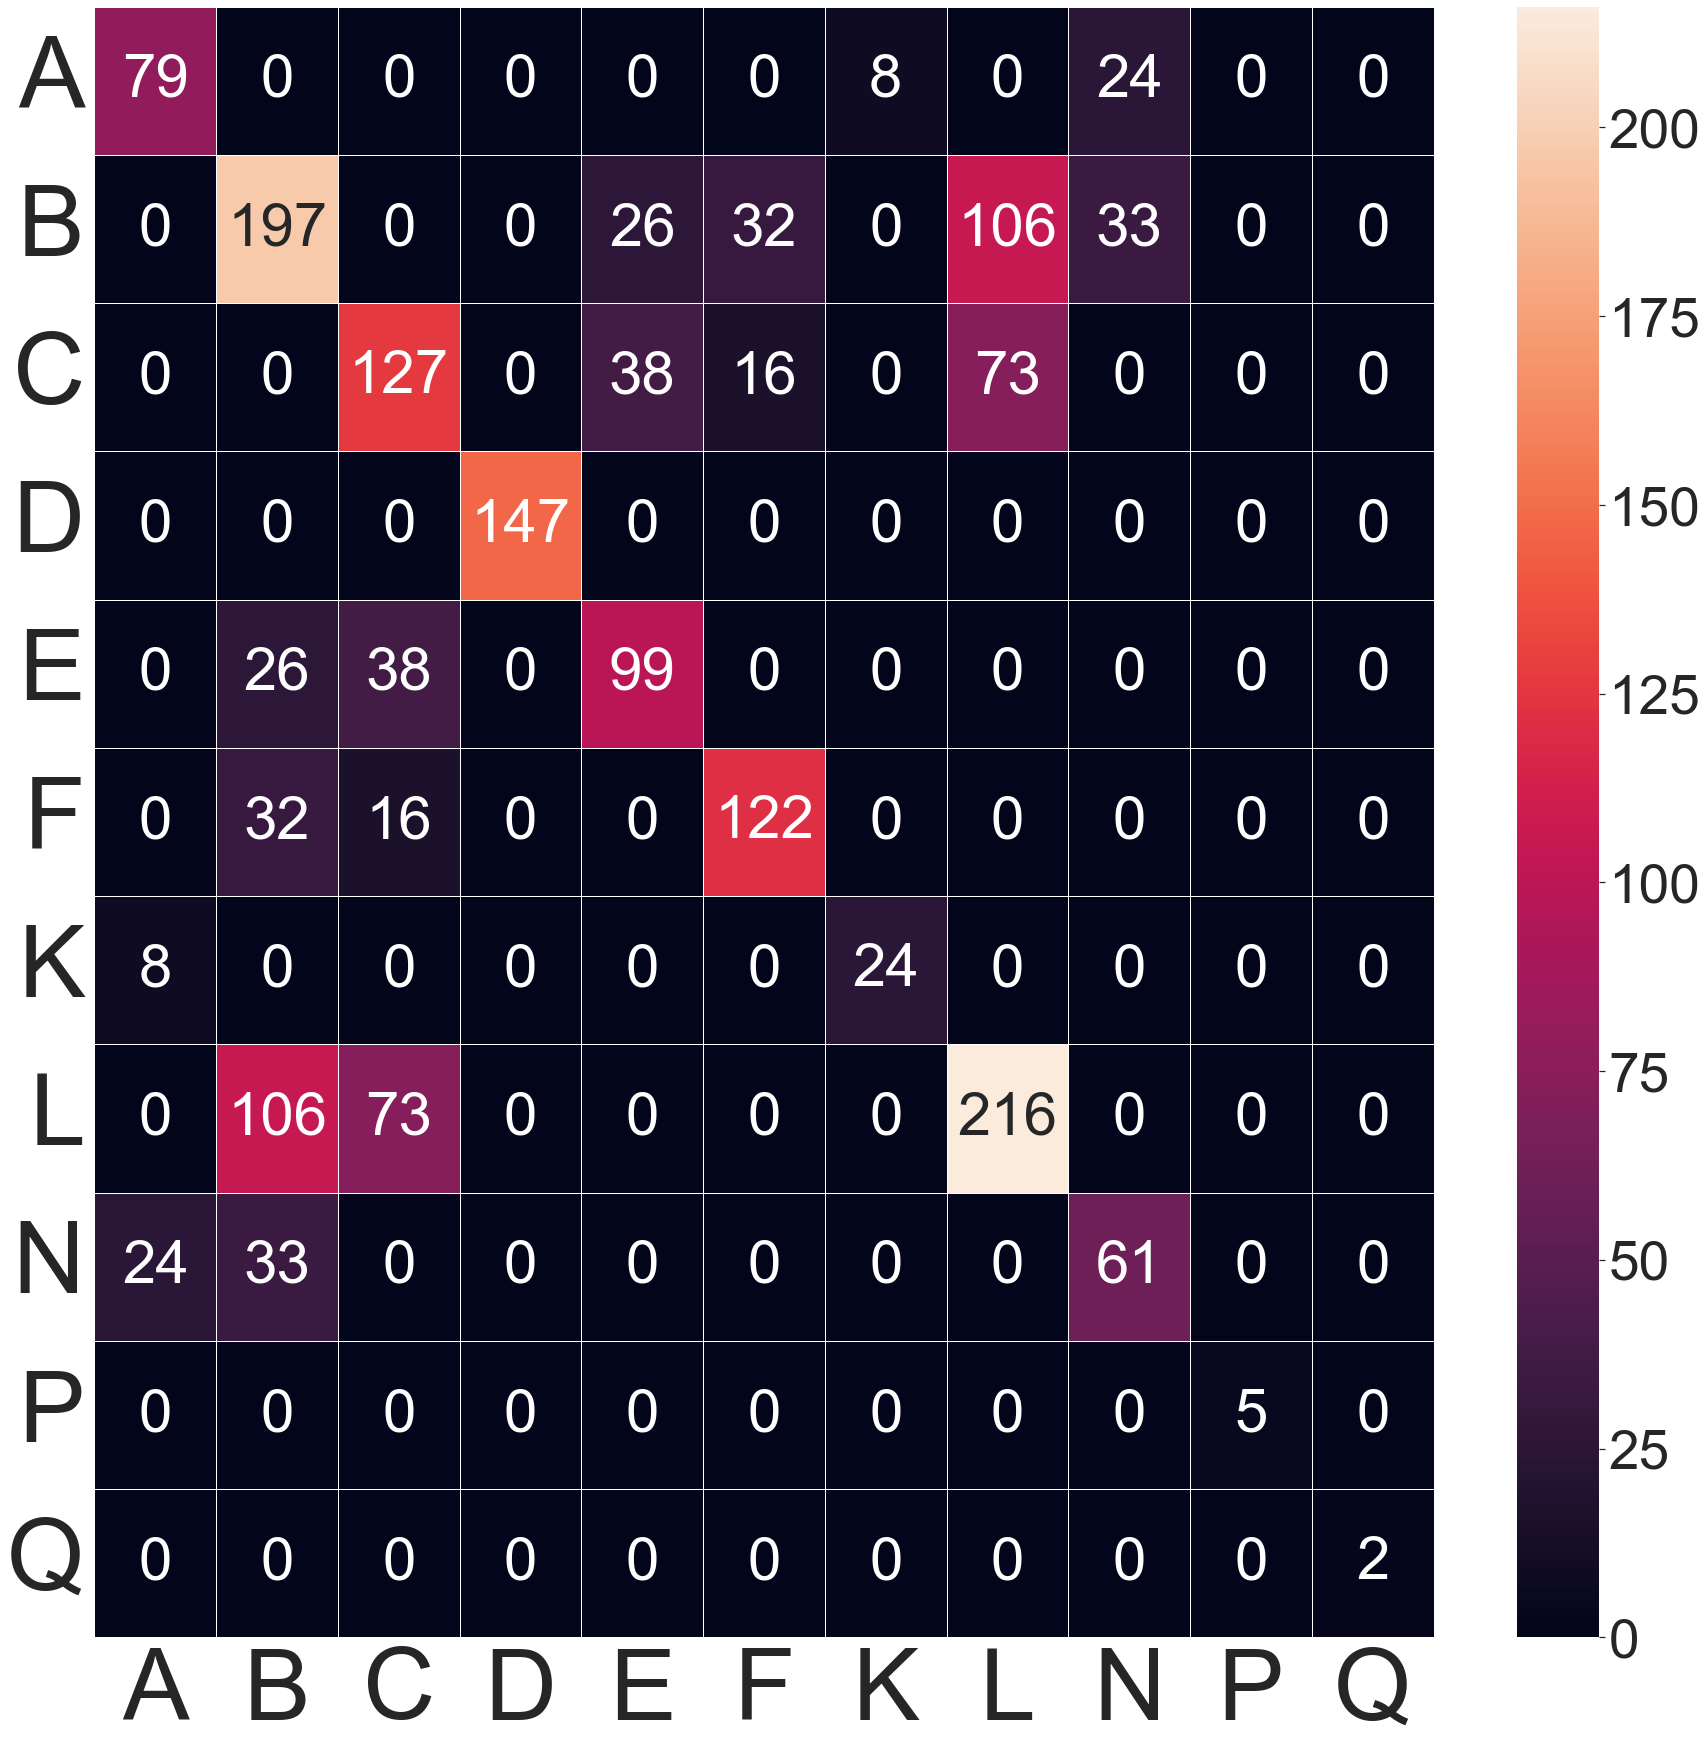

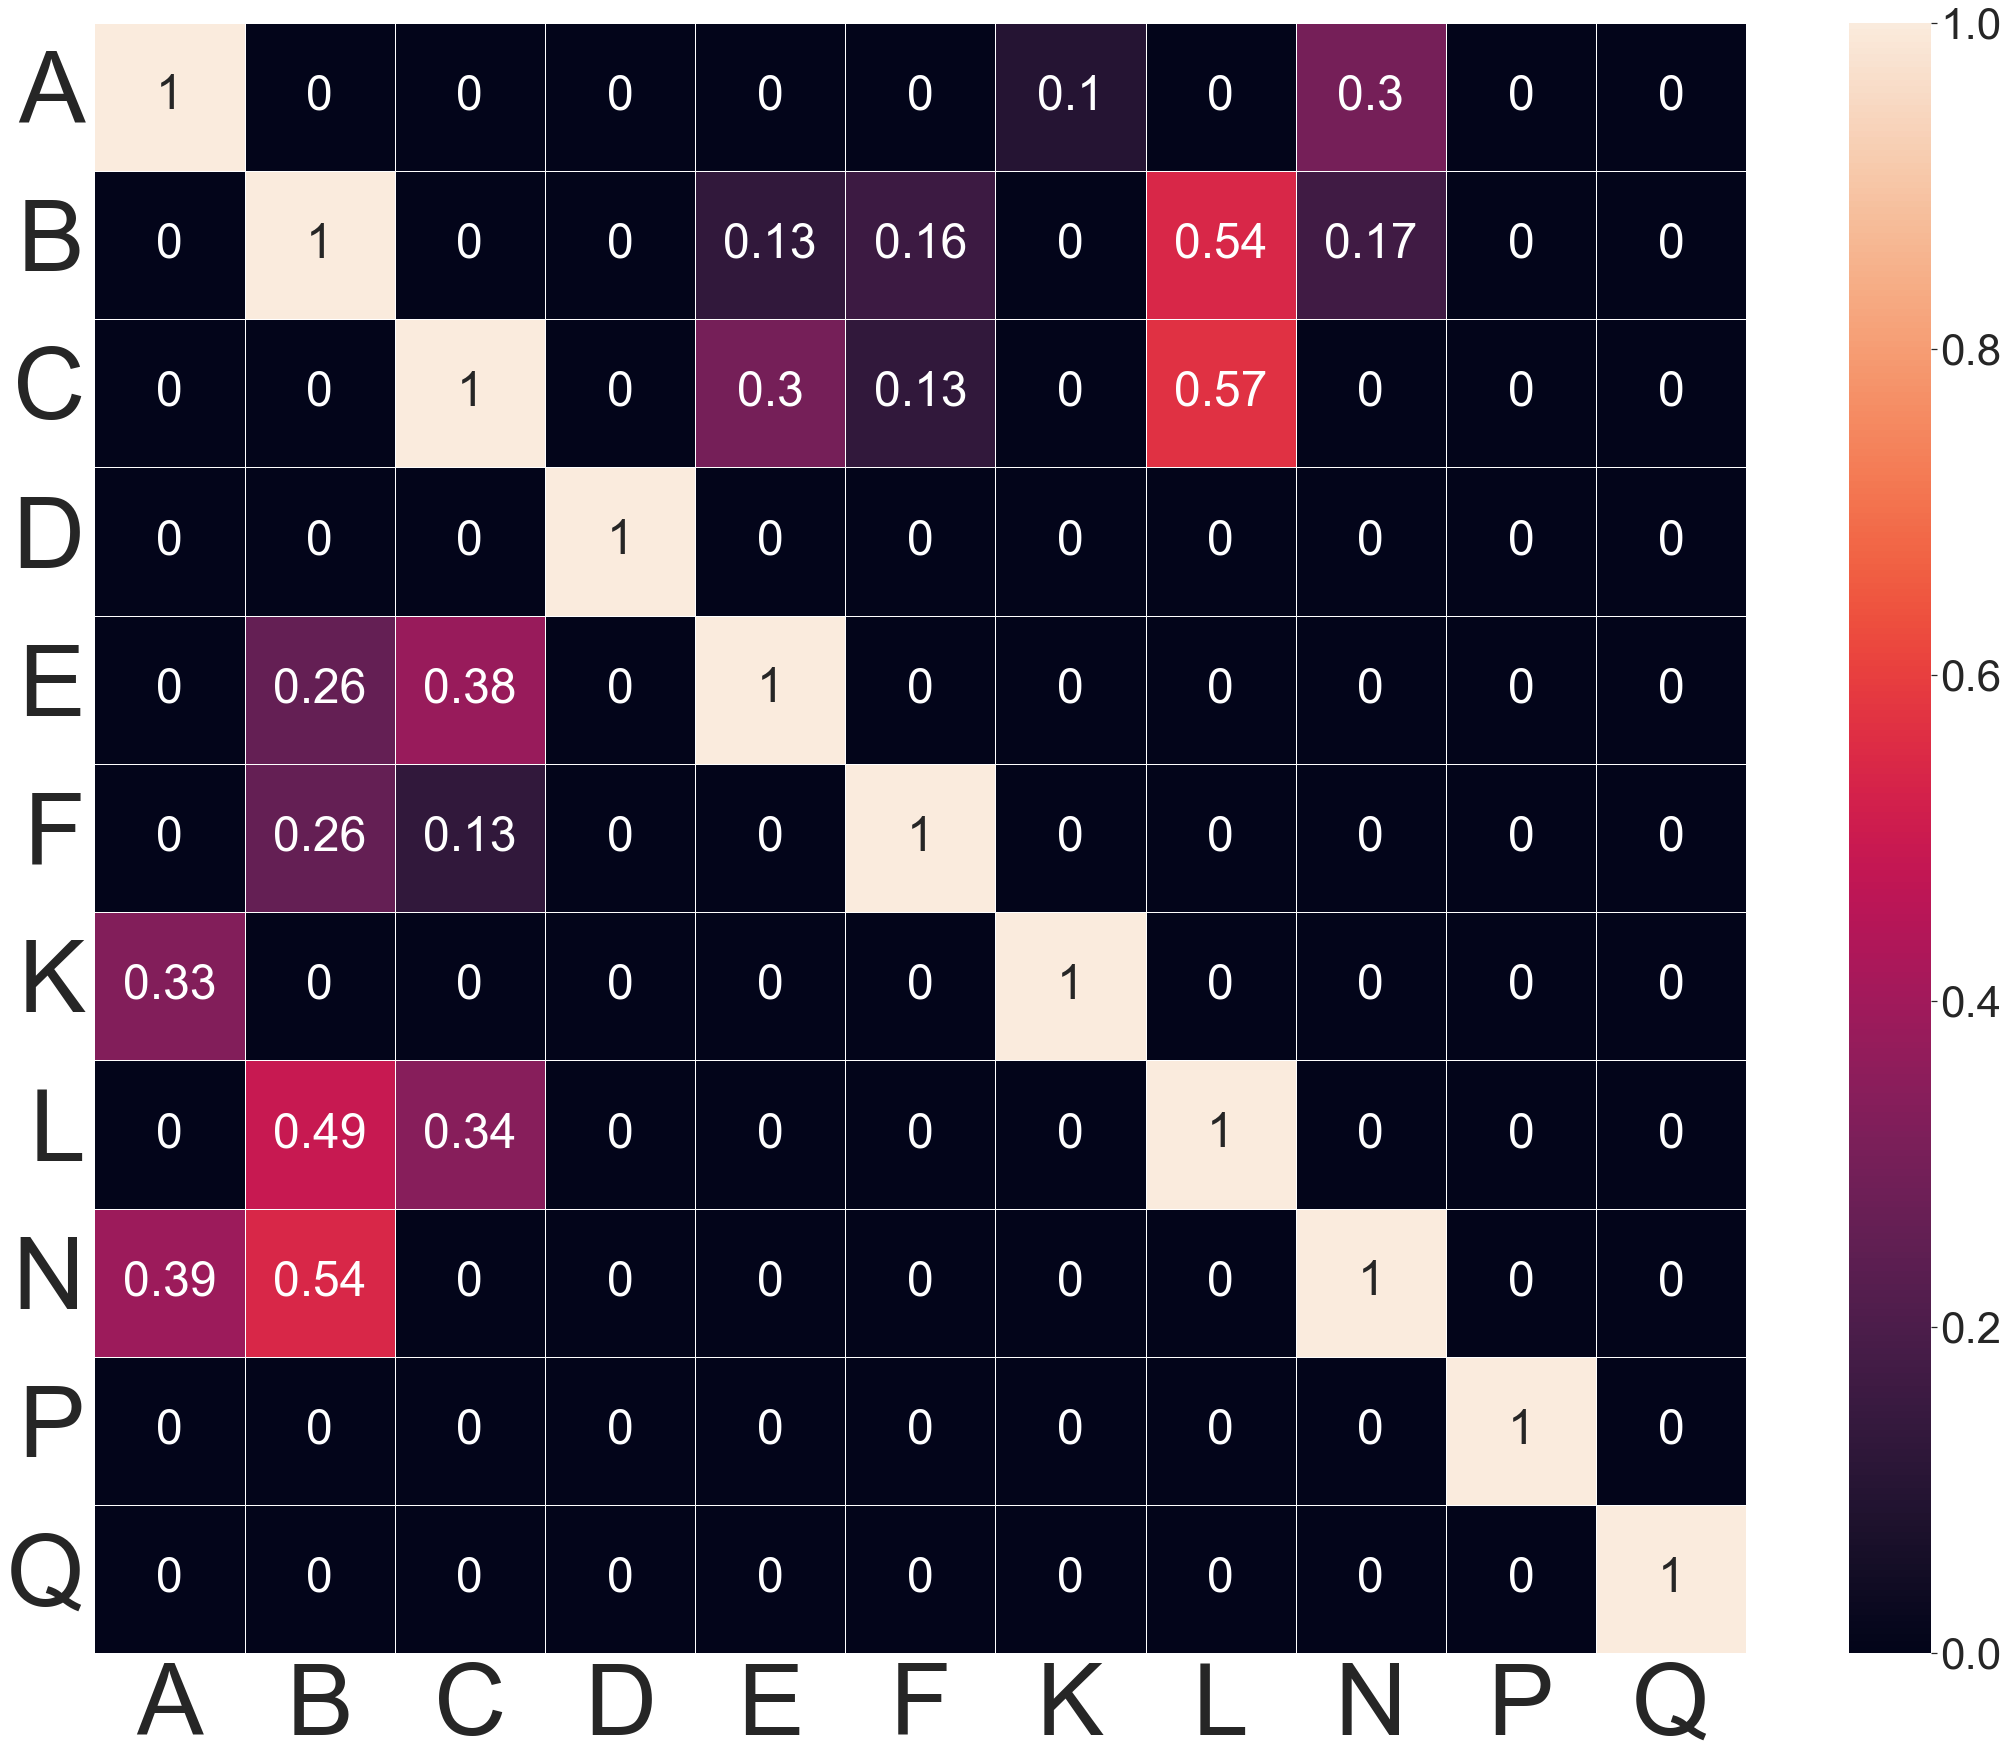

In [58]:
'''model2'''
def matrix_for_heatmap(ann):
    matrix = DataFrame(0, index = ['A','B','C','D','E','F','K','L','N','P','Q'], columns = ['A','B','C','D','E','F','K','L','N','P','Q'])
    for i in ann: 
        if len(i) ==1:
            matrix[i].loc[i]+=1
        if len(i) ==2:
            matrix[i[0]].loc[i[1]]+=1
            matrix[i[1]].loc[i[0]]+=1
            matrix[i[0]].loc[i[0]]+=1
            matrix[i[1]].loc[i[1]]+=1
    return matrix

'''the smbop mode2 (batch5)'''
bri_ann = ann5['code']
bri_ann = [str(s) for s in bri_ann]

a2 = remove_lower_int(bri_ann)
matrix2 =  matrix_for_heatmap(a2)


'''
heatmap visulization model2
'''
sns.set_theme(font_scale = 5, color_codes = 'r')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(30,30))
#ax.set_title('BRIDGE v2+ BERT Model Error Type Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix2, annot=True, fmt="d", linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/types m2 BRIDGE(b5).png')


matrix2_prob = matrix_for_prob(matrix2)
sns.set_theme(font_scale = 4, color_codes = 'r')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(37,30))
#ax.set_title('BRIDGE v2+ BERT Model Error Type Frequence Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix2_prob, annot=True, linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/types freq m2 BRIDGE(b5).png')


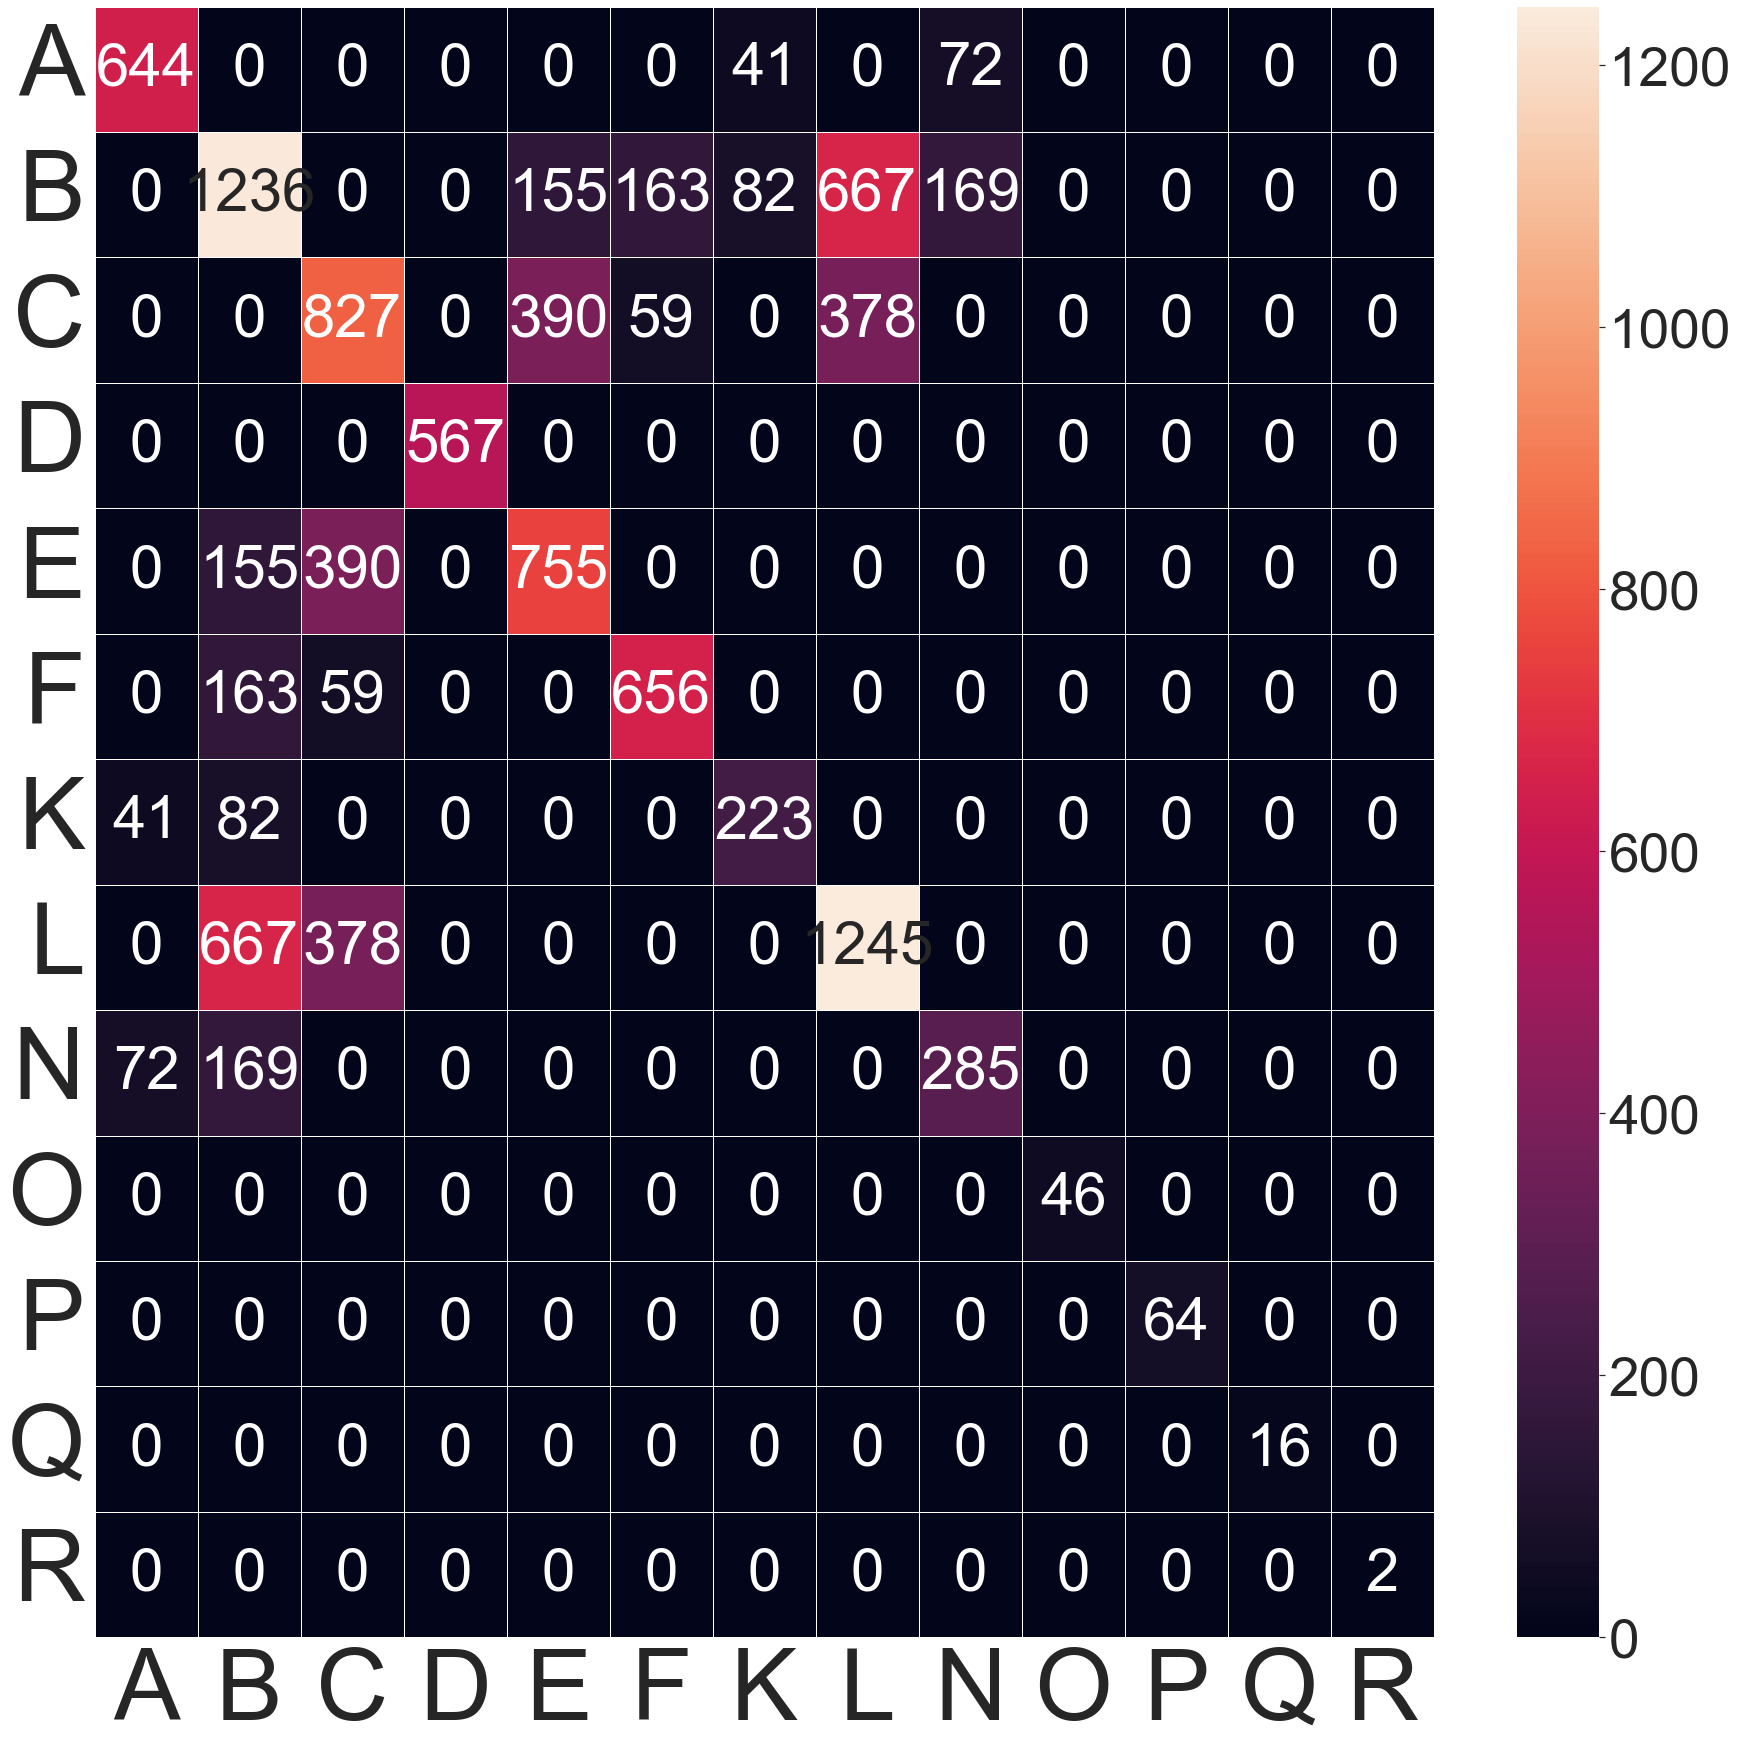

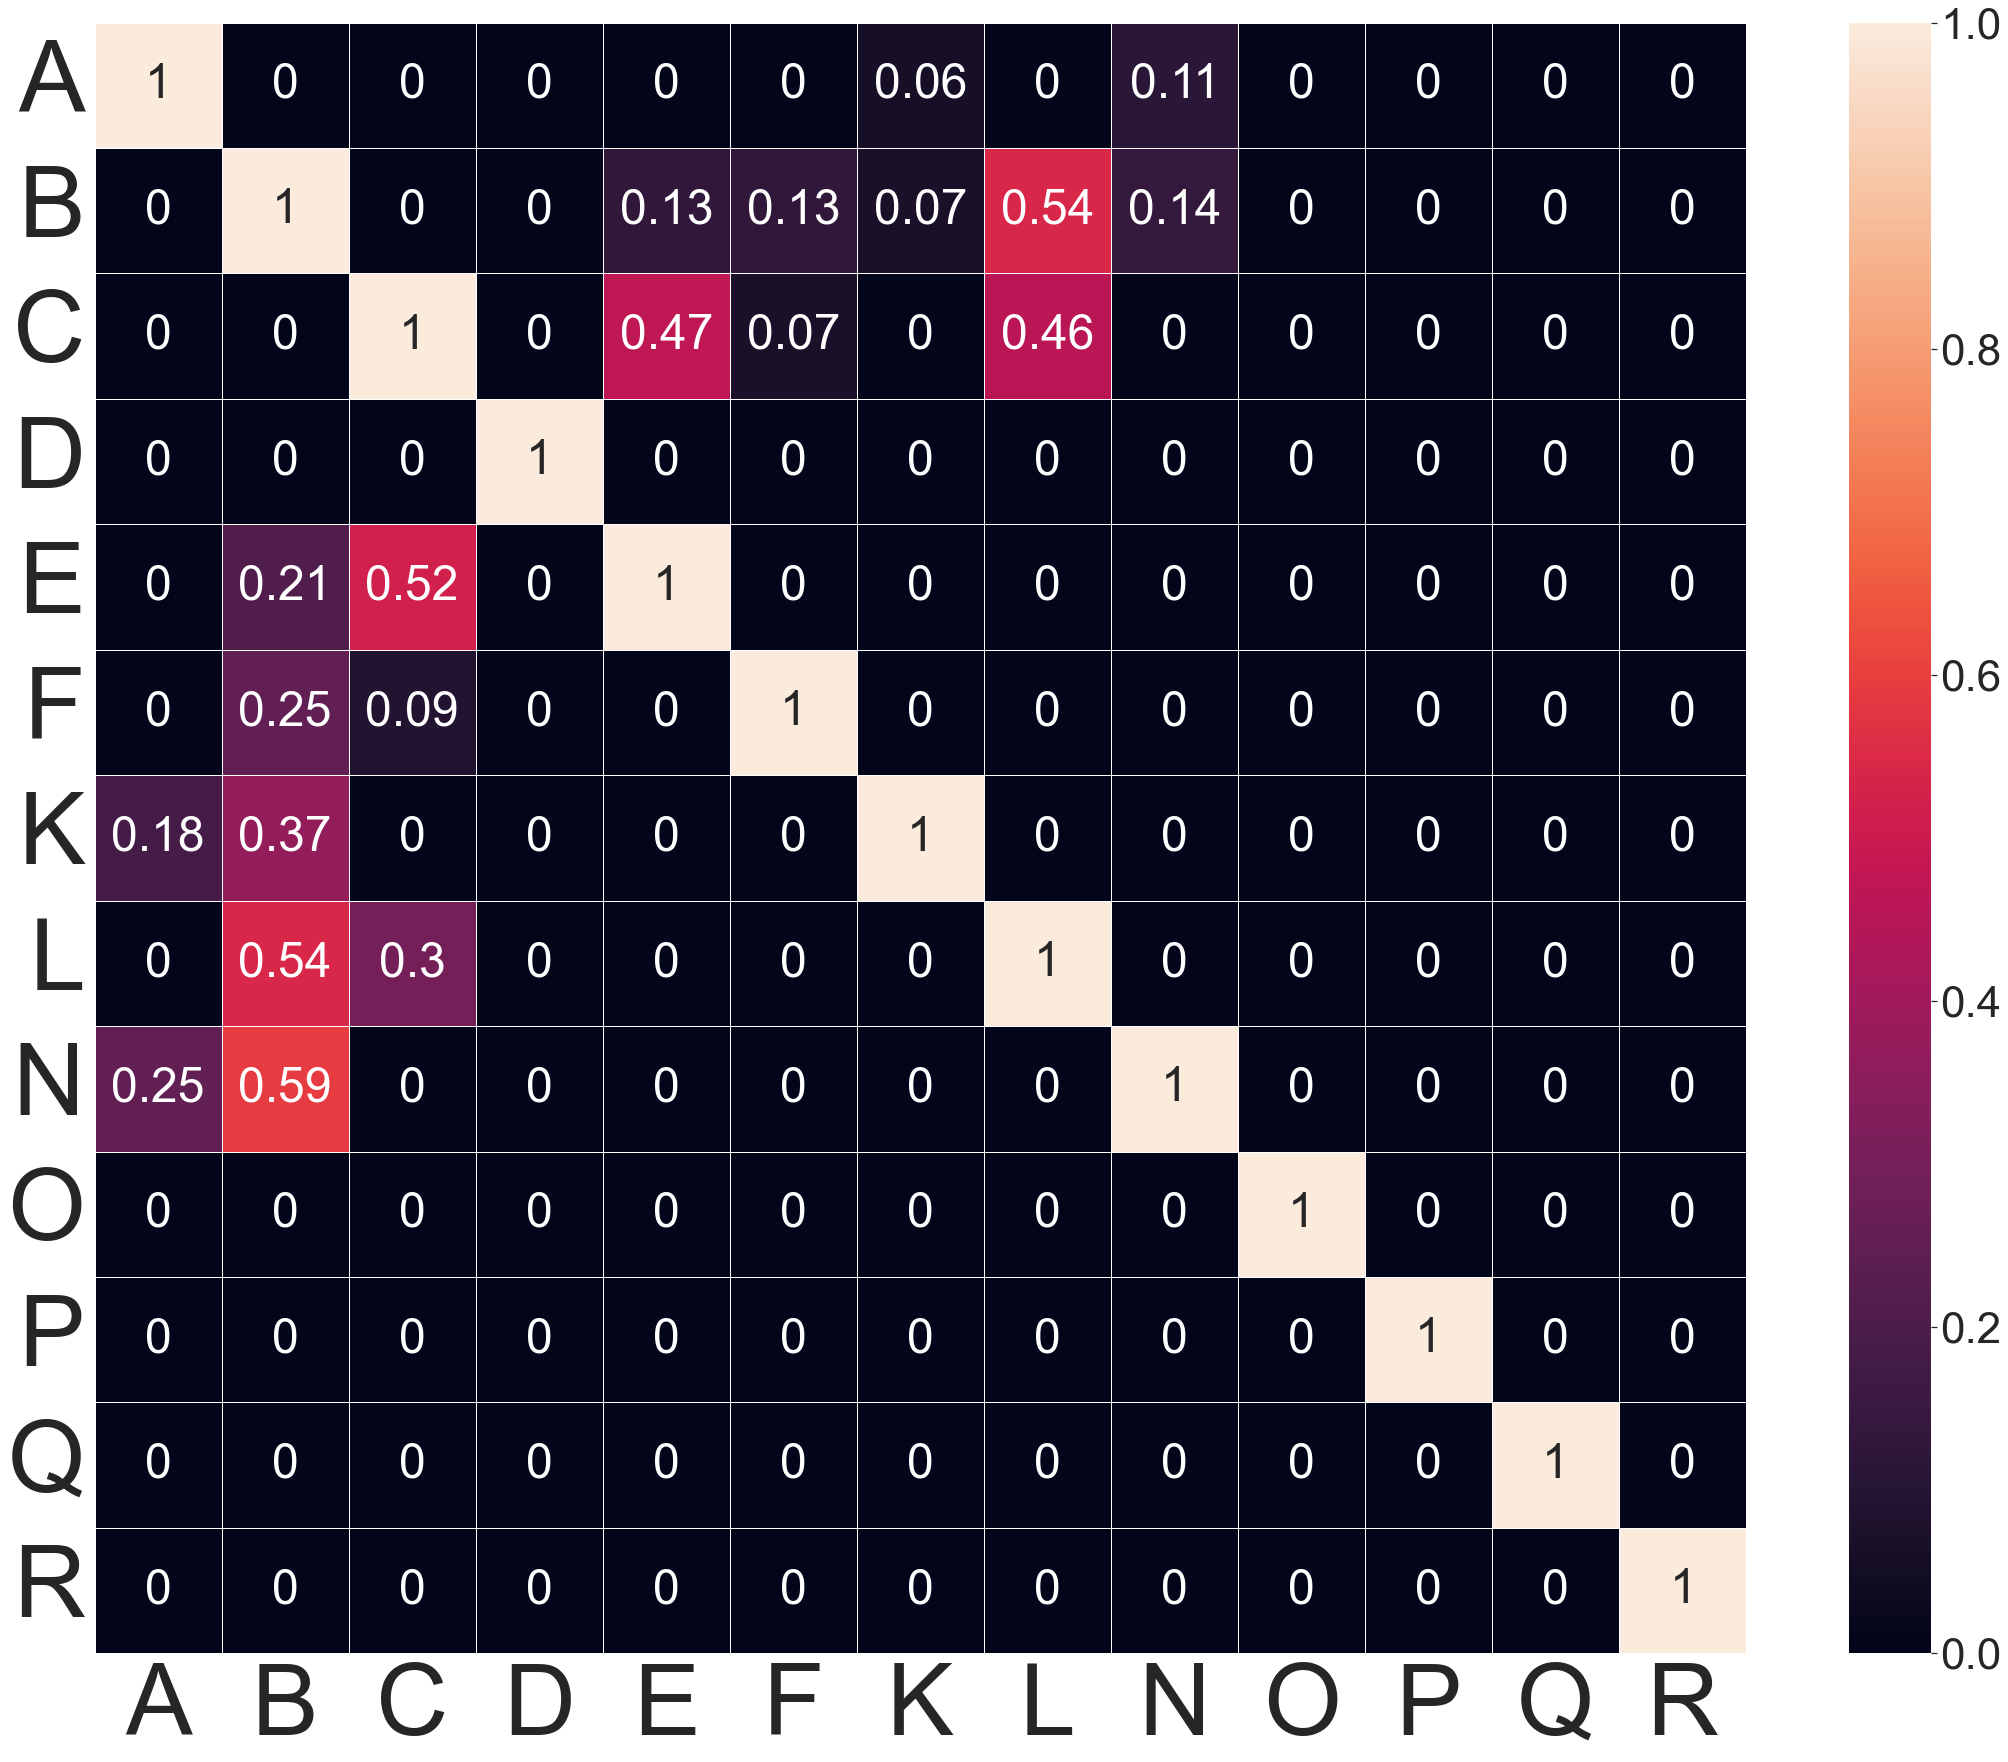

In [61]:
'''model3--gzap'''

'''
create heatmap of sum
'''
def matrix_for_heatmap(ann):
    matrix = DataFrame(0, index = ['A','B','C','D','E','F','K','L','N','O','P','Q','R'], columns = ['A','B','C','D','E','F','K','L','N','O','P','Q','R'])
    for i in ann: 
        if len(i) ==1:
            matrix[i].loc[i]+=1
        if len(i) ==2:
            matrix[i[0]].loc[i[1]]+=1
            matrix[i[1]].loc[i[0]]+=1
            matrix[i[0]].loc[i[0]]+=1
            matrix[i[1]].loc[i[1]]+=1
    return matrix

gzap_ann = ann6['code'].append(ann7['code'], ignore_index = True)
gzap_ann = [str(s) for s in gzap_ann]
a3 = remove_lower_int(gzap_ann)

matrix3 =  matrix_for_heatmap(a3)
'''
heatmap visulization
'''
sns.set_theme(font_scale = 5, color_codes = 'g')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(30,30))
#ax.set_title('GAZP Model Error Type Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix3, annot=True, fmt="d", linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/heatmap of error types in model3 -- GAZP (batch6-7).png')


matrix3_prob = matrix_for_prob(matrix3)
'''
heatmap visulization 
'''
sns.set_theme(font_scale = 4, color_codes = 'g')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(37,30))
#ax.set_title('GAZP Model Error Type Frequence Heatmap',fontsize=50,fontweight="bold")
sns.heatmap(matrix3_prob, annot=True, linewidths=1, ax=ax)
plt.yticks(fontsize=100,rotation =0)
plt.xticks(fontsize=100)
#plt.savefig('newDec.16/types freq m3 GAZP(b6-7).png')



## create ann type& category sum df for each annotator 

In [ ]:
total = pd.merge(b1['total'], b2['total'] , left_index=True, right_index=True, how = 'outer')
total = pd.merge(total , b3['total'] , left_index=True, right_index=True, how = 'outer')
total = pd.merge(total , b4['total'] , left_index=True, right_index=True, how = 'outer')
total["sum"] = total.sum(axis=1)

tianyi = pd.merge(b1['tianyi'], b2['tianyi'] , left_index=True, right_index=True, how = 'outer')
tianyi = pd.merge(tianyi , b3['tianyi'] , left_index=True, right_index=True, how = 'outer')
tianyi = pd.merge(tianyi , b4['tianyi'] , left_index=True, right_index=True, how = 'outer')
tianyi["sum"] = tianyi.sum(axis=1)

zhengn = pd.merge(b1['zhengn'], b2['zhengn'] , left_index=True, right_index=True, how = 'outer')
zhengn = pd.merge(zhengn , b3['zhengn'] , left_index=True, right_index=True, how = 'outer')
zhengn = pd.merge(zhengn , b4['zhengn'] , left_index=True, right_index=True, how = 'outer')
zhengn["sum"] = zhengn.sum(axis=1)


zhengz = pd.merge(b1['zhengz'], b2['zhengz'] , left_index=True, right_index=True, how = 'outer')
zhengz = pd.merge(zhengz , b3['zhengz'] , left_index=True, right_index=True, how = 'outer')
zhengz["sum"] = zhengz.sum(axis=1)


toby = pd.merge(b1['toby'], b2['toby'] , left_index=True, right_index=True, how = 'outer')
toby = pd.merge(toby , b3['toby'] , left_index=True, right_index=True, how = 'outer')
toby["sum"] = toby.sum(axis=1)

## visulize the total annotated error types for each annotator
**need to change to histogram**

In [ ]:
'''
error type analysis
'''
plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(total)) 

total = total['sum']
tianyi = tianyi['sum']
zhengn = zhengn['sum']
zhengz = zhengz['sum']
toby = toby['sum']
plt.plot(total, label='total error type',linewidth= 2)
plt.plot(tianyi, label='error type annotated by tianyi',linewidth= 2)
plt.plot(zhengn, label='total type annotated by zhengn',linewidth= 2)
plt.plot(zhengz, label='total type annotated by zhengz',linewidth= 2)
plt.plot(toby, label='total type annotated by toby',linewidth= 2)

plt.title('error type visualization -- NL2SQL ', fontsize= 20, fontweight="bold")
plt.xlabel('error type', fontsize= 20)
plt.ylabel('number of sqls', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig('NL2SQL error type visualization.png', dpi=300, bbox_inches='tight')

plt.show() 

**CHECK ITEMS**
batch6_sql_type_fkappa
batch6_sql_type_kalpha
batch6_sql_type_stability
batch6_sql_type_stabilitydf

batch6_sql_category_fkappa
batch6_sql_category_kalpha

batch6_category_sql_fkappa
batch6_category_sql_kalpha
batch6_sql_category_stability
batch6_sql_category_stabilitydf

**use this by changing df**
batch6_sql_type_stability.head(3)

In [ ]:
fig, axs = plt.subplots(6, 1,figsize=(30,90))  #How many rows and columns
fig.subplots_adjust(wspace=0.2,hspace=0.2) #Set the Space between subplots

'''
batch 1 type stability visulization
'''
#axs[0, 0].plt.figure(figsize=(50,20))  
b1_stability3 = batch1_sql_type_stability['stability3'][:-1]
b1_stability4 = batch1_sql_type_stability['stability4'][:-1]
axs[0].plot( b1_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql',linewidth= 2)
axs[0].plot( b1_stability4, label='the probability that there are 4 annotators agree on this error type for any sql',linewidth= 2) 
axs[0].set_title('batch1 type stability', fontsize= 20,fontweight="bold")
axs[0].set_xlabel('error type', fontsize= 20)
axs[0].set_ylabel('probability', fontsize= 20)
axs[0].legend(prop={'size': 15})
axs[0].tick_params(labelsize=20)


'''
batch 2 type stability visulization
'''
#axs[1, 0].plt.figure(figsize=(50,20))  
b2_stability3 = batch2_sql_type_stability['stability3'][:-1]
b2_stability4 = batch2_sql_type_stability['stability4'][:-1]
axs[1].plot(b2_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql',linewidth= 2)
axs[1].plot(b2_stability4, label='the probability that there are 4 annotators agree on this error type for any sql',linewidth= 2) 
axs[1].set_title('batch2 type stability', fontsize= 20,fontweight="bold")
axs[1].set_xlabel('error type', fontsize= 20)
axs[1].set_ylabel('probability', fontsize= 20)
axs[1].legend(prop={'size': 15})
axs[1].tick_params(labelsize=20)



'''
batch 3 type stability visulization
'''
#axs[2, 0].plt.figure(figsize=(50,20))  
b3_stability3 = batch3_sql_type_stability['stability3'][:-1]
b3_stability4 = batch3_sql_type_stability['stability4'][:-1]
axs[2].plot(b3_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql',linewidth= 2)
axs[2].plot(b3_stability4, label='the probability that there are 4 annotators agree on this error type for any sql',linewidth= 2) 
axs[2].set_title('batch3 type stability', fontsize= 20,fontweight="bold")
axs[2].set_xlabel('error type', fontsize= 20)
axs[2].set_ylabel('probability', fontsize= 20)
axs[2].legend(prop={'size': 15})
axs[2].tick_params(labelsize=20)

'''
batch 4 type stability visulization
'''
#axs[3, 0].plt.figure(figsize=(50,20))  
b4_stability = batch4_sql_type_stability['stability'][:-1]
axs[3].plot(b4_stability, label='the probability that there are 2 annotators agree on this error type for any sql', linewidth= 2) 
axs[3].set_title('batch4 type stability', fontsize= 20, fontweight="bold")
axs[3].set_xlabel('error type', fontsize= 20)
axs[3].set_ylabel('probability', fontsize= 20)
axs[3].legend(prop={'size': 15})
axs[3].tick_params(labelsize=20)


'''
batch 5 type stability visulization
'''
b5_stability = batch5_sql_type_stability['stability'][:-1]
axs[4].plot(b5_stability, label='the probability that there are 2 annotators agree on this error type for any sql', linewidth= 2) 
axs[4].set_title('batch 5 type stability', fontsize= 20, fontweight="bold")
axs[4].set_xlabel('error type', fontsize= 20)
axs[4].set_ylabel('probability', fontsize= 20)
axs[4].legend(prop={'size': 15})
axs[4].tick_params(labelsize=20)

'''
batch 6 type stability visulization
'''
#axs[5].plt.figure(figsize=(50,20))  
b6_stability = batch6_sql_type_stability['stability'][:-1]
axs[5].plot(b6_stability, label='the probability that there are 2 annotators agree on this error type for any sql', linewidth= 2) 
axs[5].set_title('batch 6 type stability', fontsize= 20, fontweight="bold")
axs[5].set_xlabel('error type', fontsize= 20)
axs[5].set_ylabel('probability', fontsize= 20)
axs[5].legend(prop={'size': 15})
axs[5].tick_params(labelsize=20)
# save the figure
#plt.savefig('type_stability_each.png', dpi=300, bbox_inches='tight')

plt.show() 


In [ ]:
'''
batch 1-6 type stability visulization
''' 
sql_type_stability = pd.merge(batch1_sql_type_stability[:-1], batch2_sql_type_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_type_stability = pd.merge(sql_type_stability[:-1], batch3_sql_type_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_type_stability = pd.merge(sql_type_stability[:-1], batch4_sql_type_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_type_stability = pd.merge(sql_type_stability[:-1], batch5_sql_type_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_type_stability = pd.merge(sql_type_stability[:-1], batch6_sql_type_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_type_stability = sql_type_stability.fillna(0)
sql_type_stability = sql_type_stability[:-1]


'''
batch 1 
'''
plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(sql_type_stability)) 
b1_stability3 = sql_type_stability['stability3_x']
b1_stability4 = sql_type_stability['stability4_x']
plt.plot(b1_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql in batch 1', color = 'yellow',linewidth= 2)
plt.plot(b1_stability4, label='the probability that there are 4 annotators agree on this error type for any sql in batch 1',color = 'blue', linewidth= 2) 
'''
batch 2 
'''
b2_stability3 = sql_type_stability['stability3_y']
b2_stability4 = sql_type_stability['stability4_y']
plt.plot(b2_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql in batch 2', color = 'red',linewidth= 2)
plt.plot(b2_stability4, label='the probability that there are 4 annotators agree on this error type for any sql in batch 2', color = 'green',linewidth= 2) 
'''
batch 3 
'''
b3_stability3 = sql_type_stability['stability3']
b3_stability4 = sql_type_stability['stability4']
plt.plot(b3_stability3, label='the probability that there are 3 or more annotators agree on this error type for any sql in batch 3', color = 'orange',linewidth= 2)
plt.plot(b3_stability4, label='the probability that there are 4 annotators agree on this error type for any sql in batch 3',color = 'magenta', linewidth= 2) 
'''
batch 4 
''' 
b4_stability = sql_type_stability['stability_x']
plt.plot(b4_stability, label='the probability that there are 2 annotators agree on this error type for any sql in batch 4', color = 'grey', linewidth= 2) 
plt.title('NL2SQL (batch 1-4) type stability', fontsize= 20, fontweight="bold")
plt.xlabel('error type', fontsize= 20)
plt.ylabel('probability', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig(' NL2SQL model (batch 1-4) type_stability.png', dpi=300, bbox_inches='tight')

plt.show() 

'''
batch 5 
'''
plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(sql_type_stability)) 
b5_stability = sql_type_stability['stability_y']
plt.plot(b5_stability, label='the probability that there are 2 annotators agree on this error type for any sql in batch 5', color = 'pink', linewidth= 2) 
plt.title('TSP (batch 5) type stability', fontsize= 20, fontweight="bold")
plt.xlabel('error type', fontsize= 20)
plt.ylabel('probability', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig(' TSP model (batch 1-4) type_stability.png', dpi=300, bbox_inches='tight')

plt.show() 
'''
batch 6 
''' 
plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(sql_type_stability)) 
b6_stability = sql_type_stability['stability']
plt.plot(b6_stability, label='the probability that there are 2 annotators agree on this error type for any sql in batch 6', color = 'purple', linewidth= 2) 
plt.title('model 3 (batch 6-) type stability', fontsize= 20, fontweight="bold")
plt.xlabel('error type', fontsize= 20)
plt.ylabel('probability', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig(' model 3 (batch 6-) type_stability.png', dpi=300, bbox_inches='tight')

plt.show() 

In [ ]:
'''
creat df
batch 1-6 sql_category stability
''' 
sql_category_stability = pd.merge(batch2_sql_category_stability[:-1], batch3_sql_category_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_category_stability = pd.merge(sql_category_stability[:-1], batch4_sql_category_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_category_stability = pd.merge(sql_category_stability[:-1], batch5_sql_category_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_category_stability = pd.merge(sql_category_stability[:-1], batch6_sql_category_stability[:-1], left_index=True, right_index=True, how = 'outer')
sql_category_stability = sql_category_stability.fillna(0)
sql_category_stability = sql_category_stability[:-1]
sql_category_stability = sql_category_stability.rename(columns ={'stability4_x':'b2_stability4'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability3_x':'b2_stability3'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability4_y':'b3_stability4'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability3_y':'b3_stability3'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability4_y':'b3_stability4'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability_x':'b4_stability'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability_y':'b5_stability'}) 
sql_category_stability = sql_category_stability.rename(columns ={'stability':'b6_stability'}) 
sql_category_stability = pd.merge(batch1_sql_category_stability, sql_category_stability, left_index=True, right_index=True, how = 'outer' )
sql_category_stability = sql_category_stability.fillna(0)
sql_category_stability = sql_category_stability[:-1]
sql_category_stability
sql_category_stability.head(3)

fig, axs = plt.subplots(5, 1,figsize=(20,40))  #How many rows and columns
fig.subplots_adjust(wspace=0.2,hspace=0.2) #Set the Space between subplots
'''
batch 2 category stability visulization
'''
b2_stability3 = sql_category_stability['b2_stability3']
b2_stability4 = sql_category_stability['b2_stability4']
axs[0].plot(b2_stability3, label='the probability that there are 3 or more annotators agree on this error category for any sql',linewidth= 2)
axs[0].plot(b2_stability4, label='the probability that there are 4 annotators agree on this error category for any sql',linewidth= 2) 
axs[0].set_title('batch2 category stability', fontsize= 20,fontweight="bold")
axs[0].set_xlabel('error category', fontsize= 20)
axs[0].set_ylabel('probability', fontsize= 20)
axs[0].legend(prop={'size': 15})
axs[0].tick_params(labelsize=20)

'''
batch 3 category stability visulization
'''
b3_stability3 = sql_category_stability['b3_stability3']
b3_stability4 = sql_category_stability['b3_stability4']
axs[1].plot(b3_stability3, label='the probability that there are 3 or more annotators agree on this error category for any sql',linewidth= 2)
axs[1].plot(b3_stability4, label='the probability that there are 4 annotators agree on this error category for any sql',linewidth= 2) 
axs[1].set_title('batch3 category stability', fontsize= 20,fontweight="bold")
axs[1].set_xlabel('error category', fontsize= 20)
axs[1].set_ylabel('probability', fontsize= 20)
axs[1].legend(prop={'size': 15})
axs[1].tick_params(labelsize=20)


'''
batch 4 category stability visulization
'''
b4_stability = sql_category_stability['b4_stability']
axs[2].plot(b4_stability, label='the probability that there are 4 annotators agree on this error category for any sql',linewidth= 2) 
axs[2].set_title('batch4 category stability', fontsize= 20,fontweight="bold")
axs[2].set_xlabel('error category', fontsize= 20)
axs[2].set_ylabel('probability', fontsize= 20)
axs[2].legend(prop={'size': 15})
axs[2].tick_params(labelsize=20)


'''
batch 5 category stability visulization
'''
b5_stability = sql_category_stability['b5_stability']
axs[3].plot(b5_stability, label='the probability that there are 5 annotators agree on this error category for any sql',linewidth= 2) 
axs[3].set_title('batch5 category stability', fontsize= 20,fontweight="bold")
axs[3].set_xlabel('error category', fontsize= 20)
axs[3].set_ylabel('probability', fontsize= 20)
axs[3].legend(prop={'size': 15})
axs[3].tick_params(labelsize=20)


'''
batch 6 category stability visulization
'''
b6_stability = sql_category_stability['b6_stability']
axs[4].plot(b6_stability, label='the probability that there are 6 annotators agree on this error category for any sql',linewidth= 2) 
axs[4].set_title('batch6 category stability', fontsize= 20,fontweight="bold")
axs[4].set_xlabel('error category', fontsize= 20)
axs[4].set_ylabel('probability', fontsize= 20)
axs[4].legend(prop={'size': 15})
axs[4].tick_params(labelsize=20)
# save the figure
#plt.savefig('category_stability_each.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
'''
batch 2-6 category-sql fkappa visulization
''' 
category_sql_fkappa = pd.merge(batch2_category_sql_fkappa[:-1], batch3_category_sql_fkappa[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa_x':'b2_Fleiss_kappa'}) 
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa_y':'b3_Fleiss_kappa'}) 
category_sql_fkappa = pd.merge(category_sql_fkappa[:-1], batch4_category_sql_fkappa[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_fkappa = pd.merge(category_sql_fkappa[:-1], batch5_category_sql_fkappa[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa_x':'b4_Fleiss_kappa'}) 
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa_y':'b5_Fleiss_kappa'}) 
category_sql_fkappa = pd.merge(category_sql_fkappa[:-1], batch6_category_sql_fkappa[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa':'b6_Fleiss_kappa'}) 
category_sql_fkappa = pd.merge(batch1_category_sql_fkappa[:-1], category_sql_fkappa[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_fkappa = category_sql_fkappa.rename(columns ={'Fleiss_kappa':'b1_Fleiss_kappa'}) 
category_sql_fkappa = category_sql_fkappa.fillna(0)


plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(category_sql_fkappa)) 
'''
batch 2 category 
'''
b2_fkappa = category_sql_fkappa['b2_Fleiss_kappa']
plt.plot(b2_fkappa, label='batch 2 ',linewidth= 2)
'''
batch 3 category 
'''

b3_fkappa = category_sql_fkappa['b3_Fleiss_kappa']
plt.plot(b3_fkappa, label='batch 3',linewidth= 2)
'''
batch 4 category 
'''
b4_fkappa = category_sql_fkappa['b4_Fleiss_kappa']
plt.plot(b4_fkappa, label='batch 4',linewidth= 2) 
'''
batch 5 category 
'''
b5_fkappa = category_sql_fkappa['b5_Fleiss_kappa']
plt.plot(b5_fkappa, label='batch 5',linewidth= 2) 
'''
batch 6 category 
'''
b6_fkappa = category_sql_fkappa['b6_Fleiss_kappa']
plt.plot(b6_fkappa, label='batch 6',linewidth= 2) 
plt.title('batch 2-6 category_sql_Fleiss_kappa', fontsize= 20,fontweight="bold")
plt.xlabel('error category', fontsize= 20)
plt.ylabel('Fleiss kappa', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig('category_sql_Fleiss_kappa_each.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
batch1_category_fkappa = pd.to_numeric(category_sql_fkappa['b1_Fleiss_kappa'], errors = 'coerce')
batch2_category_fkappa = pd.to_numeric(category_sql_fkappa['b2_Fleiss_kappa'], errors = 'coerce')
batch3_category_fkappa = pd.to_numeric(category_sql_fkappa['b3_Fleiss_kappa'], errors = 'coerce')
batch4_category_fkappa = pd.to_numeric(category_sql_fkappa['b4_Fleiss_kappa'], errors = 'coerce')
batch5_category_fkappa = pd.to_numeric(category_sql_fkappa['b5_Fleiss_kappa'], errors = 'coerce')

---

In [ ]:
'''
batch 2-6 category-sql kalpha visulization
''' 
category_sql_kalpha = pd.merge(batch2_category_sql_kalpha[:-1], batch3_category_sql_kalpha[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha_x':'b2_Krippendroffis_alpha'}) 
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha_y':'b3_Krippendroffis_alpha'}) 
category_sql_kalpha = pd.merge(category_sql_kalpha[:-1], batch4_category_sql_kalpha[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_kalpha = pd.merge(category_sql_kalpha[:-1], batch5_category_sql_kalpha[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha_x':'b4_Krippendroffis_alpha'}) 
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha_y':'b5_Krippendroffis_alpha'}) 
category_sql_kalpha = pd.merge(category_sql_kalpha[:-1], batch6_category_sql_kalpha[:-1], left_index=True, right_index=True, how = 'outer')
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha':'b6_Krippendroffis_alpha'}) 
category_sql_kalpha = pd.merge(batch1_category_sql_kalpha[:-1], category_sql_kalpha, left_index=True, right_index=True, how = 'outer')
category_sql_kalpha = category_sql_kalpha.fillna(0)
category_sql_kalpha = category_sql_kalpha.rename(columns ={'Krippendroffis_alpha':'b1_Krippendroffis_alpha'})

plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(category_sql_kalpha)) 
'''
batch 2 category 
'''
b2_kalpha = category_sql_kalpha['b2_Krippendroffis_alpha']
plt.plot(b2_kalpha, label='batch 2 ',linewidth= 2)
'''
batch 3 category 
'''

b3_kalpha = category_sql_kalpha['b3_Krippendroffis_alpha']
plt.plot(b3_kalpha, label='batch 3',linewidth= 2)
'''
batch 4 category 
'''
b4_kalpha = category_sql_kalpha['b4_Krippendroffis_alpha']
plt.plot(b4_kalpha, label='batch 4',linewidth= 2) 
'''
batch 5 category 
'''
b5_kalpha = category_sql_kalpha['b5_Krippendroffis_alpha']
plt.plot(b5_kalpha, label='batch 5',linewidth= 2) 
'''
batch 6 category 
'''
b6_kalpha = category_sql_kalpha['b6_Krippendroffis_alpha']
plt.plot(b6_kalpha, label='batch 6',linewidth= 2) 
plt.title('batch 2-6 category_sql_Krippendroffis_alpha', fontsize= 20,fontweight="bold")
plt.xlabel('error category', fontsize= 20)
plt.ylabel('Krippendroffis alpha', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig('category_sql_Krippendroffis_alpha_each.png', dpi=300, bbox_inches='tight')

plt.show()

## visulize the reliability of Feiss kappa and Krippendroffis alpha

In [ ]:
fig, axs = plt.subplots(5, 1,figsize=(20,50))  #How many rows and columns
fig.subplots_adjust(wspace=.1,hspace=.15) #Set the Space between subplots

'''
batch 2 category stability visulization
'''
axs[0].plot(b2_fkappa, label='Fleiss kappa',linewidth= 2)
axs[0].plot(b2_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[0].set_title('Batch2', fontsize= 20,fontweight="bold")
axs[0].set_xlabel('error categories', fontsize= 20)
axs[0].set_ylabel('agreement scores', fontsize= 20)
axs[0].legend(prop={'size': 15})
axs[0].tick_params(labelsize=20)

'''
batch 3 category stability visulization
'''
axs[1].plot(b3_fkappa, label='Fleiss kappa',linewidth= 2)
axs[1].plot(b3_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[1].set_title('Batch3', fontsize= 20,fontweight="bold")
axs[1].set_xlabel('error categories', fontsize= 20)
axs[1].set_ylabel('agreement scores', fontsize= 20)
axs[1].legend(prop={'size': 15})
axs[1].tick_params(labelsize=20)


'''
batch 4 category stability visulization
'''
axs[2].plot(b4_fkappa, label='Fleiss kappa',linewidth= 2)
axs[2].plot(b4_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[2].set_title('Batch4', fontsize= 20,fontweight="bold")
axs[2].set_xlabel('error categories', fontsize= 20)
axs[2].set_ylabel('agreement scores', fontsize= 20)
axs[2].legend(prop={'size': 15})
axs[2].tick_params(labelsize=20)


'''
batch 5 category stability visulization
'''
axs[3].plot(b5_fkappa, label='Fleiss kappa',linewidth= 2)
axs[3].plot(b5_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[3].set_title('Batch5', fontsize= 20,fontweight="bold")
axs[3].set_xlabel('error categories', fontsize= 20)
axs[3].set_ylabel('agreement scores', fontsize= 20)
axs[3].legend(prop={'size': 15})
axs[3].tick_params(labelsize=20)

'''
batch 6 category stability visulization
'''
axs[4].plot(b6_fkappa, label='Fleiss kappa',linewidth= 2)
axs[4].plot(b6_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[4].set_title('Batch6', fontsize= 20,fontweight="bold")
axs[4].set_xlabel('error categories', fontsize= 20)
axs[4].set_ylabel('agreement scores', fontsize= 20)
axs[4].legend(prop={'size': 15})
axs[4].tick_params(labelsize=20)
# save the figure
#plt.savefig('category_sql_agreement_each.png', dpi=300, bbox_inches='tight')

plt.show()

## visulize the reliability between stability and Feiss kappa and Krippendroffis alpha

In [ ]:
fig, axs = plt.subplots(5, 1,figsize=(20,50))  #How many rows and columns
fig.subplots_adjust(wspace=.5,hspace=.5) #Set the Space between subplots

'''
batch 2 category stability visulization
'''
axs[0].plot(b2_fkappa, label='Fleiss kappa',linewidth= 2)
axs[0].plot(b2_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[0].plot(b2_stability3, label='stability',linewidth= 2) 
#axs[0].plot(b2_stability4, label='stability4',linewidth= 2) 
axs[0].set_title('batch2', fontsize= 20,fontweight="bold")
axs[0].set_xlabel('error category', fontsize= 20)
axs[0].set_ylabel('agreements', fontsize= 20)
axs[0].legend(prop={'size': 15})
axs[0].tick_params(labelsize=20)

'''
batch 3 category stability visulization
'''
axs[1].plot(b3_fkappa, label='Fleiss kappa',linewidth= 2)
axs[1].plot(b3_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[1].plot(b3_stability3, label='stability',linewidth= 2) 
#axs[1].plot(b3_stability4, label='stability4',linewidth= 2) 
axs[1].set_title('batch3', fontsize= 20,fontweight="bold")
axs[1].set_xlabel('error category', fontsize= 20)
axs[1].set_ylabel('kappa', fontsize= 20)
axs[1].legend(prop={'size': 15})
axs[1].tick_params(labelsize=20)


'''
batch 4 category stability visulization
'''
axs[2].plot(b4_fkappa, label='Fleiss kappa',linewidth= 2)
axs[2].plot(b4_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[2].plot(b4_stability, label='stability',linewidth= 2) 
axs[2].set_title('batch4', fontsize= 20,fontweight="bold")
axs[2].set_xlabel('error category', fontsize= 20)
axs[2].set_ylabel('agreements', fontsize= 20)
axs[2].legend(prop={'size': 15})
axs[2].tick_params(labelsize=20)


'''
batch 5 category stability visulization
'''
axs[3].plot(b5_fkappa, label='Fleiss kappa',linewidth= 2)
axs[3].plot(b5_kalpha, label='Krippendroffis alpha',linewidth= 2)
axs[3].plot(b5_stability, label='stability',linewidth= 2)
axs[3].set_title('batch5', fontsize= 20,fontweight="bold")
axs[3].set_xlabel('error category', fontsize= 20)
axs[3].set_ylabel('agreement', fontsize= 20)
axs[3].legend(prop={'size': 15})
axs[3].tick_params(labelsize=20)

'''
batch 6 category stability visulization
'''
axs[4].plot(b6_fkappa, label='Fleiss kappa',linewidth= 2)
axs[4].plot(b6_kalpha, label='Krippendroffis alpha',linewidth= 2) 
axs[4].plot(b6_stability, label='stability',linewidth= 2)
axs[4].set_title('batch6', fontsize= 20,fontweight="bold")
axs[4].set_xlabel('error category', fontsize= 20)
axs[4].set_ylabel('agreement', fontsize= 20)
axs[4].legend(prop={'size': 15})
axs[4].tick_params(labelsize=20)
# save the figure
#plt.savefig('visualize the reliability of stability.png', dpi=300, bbox_inches='tight')

plt.show()

---

In [ ]:
'''
batch 2-6 category stability visulization
''' 

plt.figure(figsize=(30,20))
x_axis = np.linspace(0,15,len(sql_category_stability)) 
'''
batch 2 category 
'''
b2_stability3 = sql_category_stability['b2_stability3']
b2_stability4 = sql_category_stability['b2_stability4']
plt.plot(b2_stability3, label='the probability that there are 3 or more annotators agree on this error category for any sql in batch 2',linewidth= 2)
plt.plot(b2_stability4, label='the probability that there are 4 annotators agree on this error category for any sql in batch 2',linewidth= 2) 
'''
batch 3 category 
'''

b3_stability3 = sql_category_stability['b3_stability3']
b3_stability4 = sql_category_stability['b3_stability4']
plt.plot(b3_stability3, label='the probability that there are 3 or more annotators agree on this error category for any sql in batch 3',linewidth= 2)
plt.plot(b3_stability4, label='the probability that there are 4 annotators agree on this error category for any sql in batch 3',linewidth= 2) 
'''
batch 4 category 
'''
b4_stability = sql_category_stability['b4_stability']
plt.plot(b4_stability, label='the probability that there are 2 annotators agree on this error category for any sql in batch 4',linewidth= 2) 
'''
batch 5 category 
'''
b5_stability = sql_category_stability['b5_stability']
plt.plot(b5_stability, label='the probability that there are 2 annotators agree on this error category for any sql in batch 5',linewidth= 2) 
'''
batch 6 category 
'''
b6_stability = sql_category_stability['b6_stability']
plt.plot(b6_stability, label='the probability that there are 2 annotators agree on this error category for any sql in batch 6',linewidth= 2) 
plt.title('batch 2-6 category stability', fontsize= 20,fontweight="bold")
plt.xlabel('error category', fontsize= 20)
plt.ylabel('probability', fontsize= 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
# save the figure
#plt.savefig('category_stability_6_1.png', dpi=300, bbox_inches='tight')

plt.show()

---
## 09/11/21

[seaborn](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html) [seaborn](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) [combine models](https://www.tutorialspoint.com/how-to-combine-multiple-graphs-in-python) [experiencial blog publication ready plot](https://onezero.blog/generate-publication-ready-plots-using-seaborn-library-part-1/)

---
----
❗️❗️❗️❗️❗️❗️❗️❗️
## seaborn

In [ ]:
'''calculated the averge agreements''' 
smbop_sql_category_stability = sql_category_stability[['b1_stability3', 'b2_stability3', 'b3_stability3', 'b4_stability']]
smbop_category_sql_fkappa = category_sql_fkappa[['b1_Fleiss_kappa','b2_Fleiss_kappa','b3_Fleiss_kappa','b4_Fleiss_kappa']]
smbop_category_sql_kalpha = category_sql_kalpha[['b1_Krippendroffis_alpha','b2_Krippendroffis_alpha','b3_Krippendroffis_alpha','b4_Krippendroffis_alpha']]
'''where num of annotator is 4'''
def averge_each_row(df):
    ls = []
    for i in df.sum(axis=1):
        ls.append(i/4)     
    df['average'] = ls
    return df

smbop_sql_category_stability = averge_each_row(smbop_sql_category_stability)
smbop_category_sql_fkappa = averge_each_row(smbop_category_sql_fkappa)
smbop_category_sql_kalpha = averge_each_row(smbop_category_sql_kalpha)


In [ ]:
import os
for dirname, _, filenames in os.walk('/Users/tianyisun/Desktop/NLQbatches/batch6'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Rat_Sql
batch6_Fleiss_kappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_category_Fleiss_kappa.csv')
batch6_Krippendroffis_alpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_category_Krippendroffis_alpha.csv')
batch7_Fleiss_kappa = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/batch7_category_Fleiss_kappa.csv')
batch7_Krippendroffis_alpha = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/batch7_category_Krippendroffis_alpha.csv')


In [ ]:
Rat_Sql_Krippendroffis_alpha = Rat_Sql_Krippendroffis_alpha.rename(columns ={'Krippendroffis_alpha_x':'b6'}) 
Rat_Sql_Krippendroffis_alpha = Rat_Sql_Krippendroffis_alpha.rename(columns ={'Krippendroffis_alpha_y':'b7'}) 
batch6_Krippendroffis_alpha = batch6_Krippendroffis_alpha.set_index('category')
batch7_Krippendroffis_alpha = batch7_Krippendroffis_alpha.set_index('category')
Rat_Sql_Krippendroffis_alpha = pd.merge(batch6_Krippendroffis_alpha, batch7_Krippendroffis_alpha, left_index=True, right_index=True, how = 'outer' )
Rat_Sql_Krippendroffis_alpha = Rat_Sql_Krippendroffis_alpha.rename(columns ={'Krippendroffis_alpha_x':'b6'}) 
Rat_Sql_Krippendroffis_alpha = Rat_Sql_Krippendroffis_alpha.rename(columns ={'Krippendroffis_alpha_y':'b7'}) 
Rat_Sql_Krippendroffis_alpha.head(2)

In [ ]:
'''where num of annotator is 2'''
def averge_each_row(df):
    ls = []
    for i in df.sum(axis=1):
        ls.append(i/2)     
    df['average'] = ls
    return df
Rat_Sql_Krippendroffis_alpha = averge_each_row(Rat_Sql_Krippendroffis_alpha)
Rat_Sql_Krippendroffis_alpha

In [ ]:
batch6_Fleiss_kappa = batch6_Fleiss_kappa.rename(columns ={'Unnamed: 0':'category'}) 
batch6_Fleiss_kappa = batch6_Fleiss_kappa.set_index('category')
batch7_Fleiss_kappa = batch7_Fleiss_kappa.rename(columns ={'Unnamed: 0':'category'}) 
batch7_Fleiss_kappa = batch7_Fleiss_kappa.set_index('category')
Rat_Sql_Fleiss_kappa = pd.merge(batch6_Fleiss_kappa, batch7_Fleiss_kappa, left_index=True, right_index=True, how = 'outer' )
Rat_Sql_Fleiss_kappa = Rat_Sql_Fleiss_kappa.rename(columns ={'Fleiss_kappa_x':'b6'}) 
Rat_Sql_Fleiss_kappa = Rat_Sql_Fleiss_kappa.rename(columns ={'Fleiss_kappa_y':'b7'}) 
Rat_Sql_Fleiss_kappa = averge_each_row(Rat_Sql_Fleiss_kappa)
Rat_Sql_Fleiss_kappa

In [ ]:
Rat_Sql_sum['sum'] = 0
Rat_Sql_sum['sum'] = Rat_Sql_sum.sum(axis=1)
Rat_Sql_sum = Rat_Sql_sum.rename(columns={'average':'kalpha_average'})
Rat_Sql_sum = Rat_Sql_sum.rename(columns={'average':'fkappa_average'})
#Rat_Sql_sum = Rat_Sql_sum.rename(columns ={'average':'stability_average'}) 
Rat_Sql_sum.head(2)

In [ ]:
smbop_cat_sum['sum'] = 0
smbop_cat_sum['sum'] = smbop_cat_sum.sum(axis=1)
df = pd.DataFrame(index =['A','B','C','D', 'E','F','G','H','I','K','L','M','N','O','P','Q','R'])
smbop_cat_sum = pd.merge(df, smbop_cat_sum,left_index=True, right_index=True, how = 'outer' )
smbop_cat_sum = smbop_cat_sum.fillna(0)
smbop_cat_sum = smbop_cat_sum[['sum']]
smbop_cat_sum

In [ ]:
smbop_cat_sum['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error in WHERE','Join error (JOIN)', 
                         'Condition error (WHERE)','Ground truth error','Syntax error',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)', 'Clause error (HAVING)', 'Operator error (LIKE)', 'Statement error (LIMIT)', 'Clause error (INTERSECT)']
smbop_cat_sum = smbop_cat_sum.set_index('name')
smbop_cat_sum

In [ ]:
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(smbop_cat_sum.index, smbop_cat_sum['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =80)
plt.yticks(fontsize=30)
#plt.twinx()
title = "The total number of SQL queries in each error category generated from SmBoP + GraPPa model."
plt.title('\n'.join(wrap(title,90)), fontsize=30,fontweight="bold")
plt.savefig('SmBoP + GraPP 70.png')

In [ ]:
#smbop_cat_sum['sum'] = 0
#smbop_cat_sum['sum'] = smbop_cat_sum.sum(axis=1)
df = pd.DataFrame(index =['A','B','C','D', 'E','F','G','H','I','K','L','M','N','O','P','Q','R'])
bridge_sum = pd.merge(df, ann5_cat[['sum']],left_index=True, right_index=True, how = 'outer' )
bridge_sum = bridge_sum.fillna(0)
bridge_sum = bridge_sum[['sum']]
bridge_sum['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error in WHERE','Join error (JOIN)', 
                         'Condition error (WHERE)','Ground truth error','Syntax error',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)', 'Clause error (HAVING)', 'Operator error (LIKE)', 'Statement error (LIMIT)', 'Clause error (INTERSECT)']

#
bridge_sum = bridge_sum.set_index('name')
bridge_sum


In [ ]:
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(bridge_sum.index, bridge_sum['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =80)
plt.yticks(fontsize=30)
#plt.twinx()
title = "The total number of SQL queries in each error category generated from BRIDGE v2 + BERT(Ensemble) model."
plt.title('\n'.join(wrap(title,90)), fontsize=30,fontweight="bold")
plt.savefig('BRIDGE v2 + BERT(Ensemble) 70.png')

In [ ]:
df = pd.DataFrame(index =['A','B','C','D', 'E','F','G','H','I','K','L','M','N','O','P','Q','R'])
Rat_Sql_sum = pd.merge(df, Rat_Sql_sum,left_index=True, right_index=True, how = 'outer' )
Rat_Sql_sum = Rat_Sql_sum.fillna(0)
Rat_Sql_sum = Rat_Sql_sum[['sum']]
Rat_Sql_sum['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error in WHERE','Join error (JOIN)', 
                         'Condition error (WHERE)','Ground truth error','Syntax error',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)', 'Clause error (HAVING)', 'Operator error (LIKE)', 'Statement error (LIMIT)', 'Clause error (INTERSECT)']

#
Rat_Sql_sum = Rat_Sql_sum.set_index('name')
Rat_Sql_sum

In [ ]:
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(Rat_Sql_sum.index, Rat_Sql_sum['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =80)
plt.yticks(fontsize=30)
#plt.twinx()
title = "The total number of SQL queries in each error category generated from GAZP model."
plt.title('\n'.join(wrap(title,90)), fontsize=30,fontweight="bold")
plt.savefig('GAZP 70.png')

In [ ]:
# model 1 
model_smbop_cat = pd.merge(smbop_cat_sum[['sum']], 
                         smbop_category_sql_fkappa['fkappa_average'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_smbop_cat = pd.merge(model_smbop_cat, 
                         smbop_category_sql_kalpha['kalpha_average'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_smbop_cat = pd.merge(model_smbop_cat, 
                         smbop_sql_category_stability['stability_average'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_smbop_cat = model_smbop_cat.sort_index()
model_smbop_cat['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error','Join error (JOIN)', 
                         'Condition error (WHERE)','Ground truth error','Syntax error',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)']
model_smbop_cat = model_smbop_cat.set_index('name')
# set the width
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(model_smbop_cat.index, model_smbop_cat['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =70)
plt.yticks(fontsize=30)

plt.twinx()
title = "The total number of SQL queries in each error category generated from SmBoP + GraPPa model and the degree of agreement that those SQL queries are classified in their error category. The degree of agreement for each error category is measured by Fleiss' kappa and Krippendorff's alpha."
plt.title('\n'.join(wrap(title,90)), fontsize=30,fontweight="bold")

Fleiss_kappa = plt.plot(model_smbop_cat.index, model_smbop_cat['fkappa_average'], 'o-', label='Fleiss kappa', color='blue')
Krippendroffis_alpha = plt.plot(model_smbop_cat.index, model_smbop_cat['kalpha_average'],'o-', label='Krippendroffis alpha', color='red')
#stability = plt.plot(model_smbop_cat.index, model_smbop_cat['stability_average'], 'o-', label='stability', color='red')

#plt.title('SmBoP + GraPP', fontsize= 30,fontweight="bold")
plt.xlabel('error category', fontsize= 30,fontweight="bold")
plt.ylabel('Agreement scores', fontsize= 30)
plt.legend(prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('SmBoP + GraPPa 70.png')
# plt.show()

In [ ]:
# model 2 
model_tsp_cat = pd.merge(ann5_cat[['sum']], 
                         category_sql_fkappa['b5_Fleiss_kappa'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_tsp_cat = pd.merge(model_tsp_cat, 
                         category_sql_kalpha['b5_Krippendroffis_alpha'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_tsp_cat = pd.merge(model_tsp_cat, 
                         sql_category_stability['b5_stability'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
model_tsp_cat = model_tsp_cat.sort_index()
model_tsp_cat['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error','Join error (JOIN)', 
                         'Condition error (WHERE)',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)','Clause error (HAVING)',
                         'Operator error (LIKE)','Statement error (LIMIT)']
#                         'From error (FROM)','Group error (GROUP BY)','HAVING','LIKE','LIMIT']                     
#                         'From error (FROM)','Group error (GROUP BY)','HAVING','LIKE','LIMIT']


model_tsp_cat = model_tsp_cat.set_index('name')
# set the width
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(model_tsp_cat.index, model_tsp_cat['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =70)
plt.yticks(fontsize=30)
plt.twinx()
Fleiss_kappa = plt.plot(model_tsp_cat.index, model_tsp_cat['b5_Fleiss_kappa'], 'o-', label='Fleiss kappa', color='blue')
Krippendroffis_alpha = plt.plot(model_tsp_cat.index, model_tsp_cat['b5_Krippendroffis_alpha'],'o-', label='Krippendroffis alpha', color='red')
#stability = plt.plot(model_tsp_cat.index, model_tsp_cat['b5_stability'], 'o-', label='stability', color='red')
title = "The total number of SQL queries in each error category generated from BRIDGE v2 + BERT(Ensemble) model and the degree of agreement that those SQL queries are classified in their error category. The degree of agreement for each error category is measured by Fleiss' kappa and Krippendorff's alpha."
plt.title('\n'.join(wrap(title,105)), fontsize=30,fontweight="bold")
plt.xlabel('Error Category', fontsize= 30, rotation="vertical")
plt.ylabel('Agreement scores', fontsize= 30)
plt.yticks(fontsize=30)
plt.legend(prop={'size': 30})
plt.savefig('BRIDGE v2 + BERT(Ensemble) 70.png')
plt.show()


In [ ]:
# model 3 
Rat_Sql = pd.merge(Rat_Sql_sum[['sum']], 
                         Rat_Sql_Fleiss_kappa['average'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
Rat_Sql = pd.merge(Rat_Sql, 
                         Rat_Sql_Krippendroffis_alpha['average'], 
                         left_index=True, 
                         right_index=True, 
                         how = 'left')
Rat_Sql = Rat_Sql.sort_index()
Rat_Sql = Rat_Sql.rename(columns={'average_x':'fkappa_average'})
Rat_Sql = Rat_Sql.rename(columns={'average_y':'kalpha_average'})
Rat_Sql['name'] = ['Keyword error', 'Column error', 'Table error', 'Value error','Join error (JOIN)', 
                         'Condition error (WHERE)',
                         'Misunderstand NL instruction', 'Sorting error (ORDER BY)','Select error (SELECT)',
                         'From error (FROM)','Group error (GROUP BY)','Clause error (HAVING)',
                         'Operator error (LIKE)','Statement error (LIMIT)', 'Clause error (INTERSECT)']
Rat_Sql = Rat_Sql.set_index('name')
# set the width
Width = 0.2
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
Iphone = plt.bar(Rat_Sql.index, Rat_Sql['sum'] ,color='green')
plt.ylabel('Number of SQL queries', fontsize= 30)
plt.xticks(fontsize=30,rotation =80)
plt.yticks(fontsize=30)
plt.twinx()
Fleiss_kappa = plt.plot(Rat_Sql.index, Rat_Sql['fkappa_average'], 'o-', label="Fleiss' kappa", color='blue')
Krippendroffis_alpha = plt.plot(Rat_Sql.index, Rat_Sql['kalpha_average'],'o-', label="Krippendorff's alpha", color='red')

title = "The total number of SQL queries in each error category generated from GAZP model and the degree of agreement that those SQL queries are classified in their error category. The degree of agreement for each error category is measured by Fleiss' kappa and Krippendorff's alpha."
plt.title('\n'.join(wrap(title,105)), fontsize=30,fontweight="bold")
plt.xlabel('Error Category', fontsize= 30, rotation="vertical")
plt.ylabel('Agreement scores', fontsize= 30)
plt.yticks(fontsize=30)
plt.legend(prop={'size': 30})
plt.savefig('GAZP 70.png')
plt.show()